# Compare noise2self with and without transfer learning
Test on confocal dataset;  
Transfer learning setting point: trained Unet on FMD dataset and simulated dataset  
Note: upsampling layers in Unet is changed to nearest  

In [2]:
import sys
sys.path.append("..")

from util import show, plot_images, plot_tensors, psnr
from data_loader import tiff_loader, load_confocal

In [3]:
import torch
import math
import json
import matplotlib.pyplot as plt
import os.path
import datetime
import numpy as np

# Prepare for self-supervision training

In [4]:
from util import getbestgpu
device = getbestgpu(1)

GPU device 0 has 7306 MiB left.
--> GPU device 0 was chosen


In [5]:
from mask import Masker
masker = Masker(width = 4, mode='interpolate')

In [6]:
from models.unet import Unet
from torch.optim import Adam

# Run results
performance vs sample_size

In [7]:
from metric import frc, match_intensity, quantify, plot_quantifications
from train import train

In [8]:
filename = './results/transfer-random_vs_psignal-lysosome.txt'

In [9]:
config = {
    'sample_size_list' : [10],
    'root' : '/home/yina/DeepDenoising/Data/Confocal/Cropped',
    'psignal_levels' : [i for i in range(10,51,5)], #[s for s in range(10,100,10)],
    'types' : ['lysosome'], # ['DNA', 'lysosome', 'microtubule', 'mitochondria'],
    'captures' : 1,
    'train_stat' : True,
    'patch_size' : 128,
    'batch_size' : 32,
    'n_iters' : 10000,
    'repeats' : 10,
    'metrics_key' : ['mse', 'ssmi', 'frc'],
    'loss':'mse',
    'Unet':{'up':'tconv'}
}

(10, 1, 128, 128)
Peak signal:  10 tensor(0.0764)
(10, 1, 128, 128)
Peak signal:  15 tensor(0.0764)
(10, 1, 128, 128)
Peak signal:  20 tensor(0.0764)
(10, 1, 128, 128)
Peak signal:  25 tensor(0.0764)
(10, 1, 128, 128)
Peak signal:  30 tensor(0.0764)
(10, 1, 128, 128)
Peak signal:  35 tensor(0.0764)
(10, 1, 128, 128)
Peak signal:  40 tensor(0.0764)
(10, 1, 128, 128)
Peak signal:  45 tensor(0.0764)
(10, 1, 128, 128)
Peak signal:  50 tensor(0.0764)


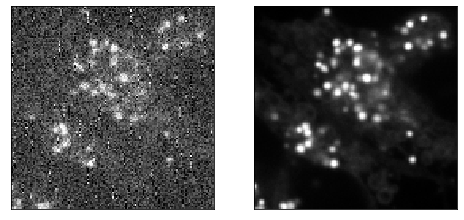

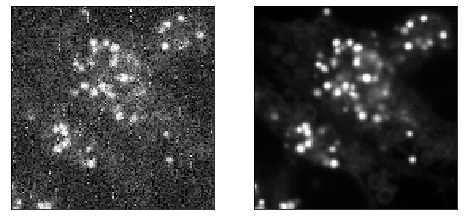

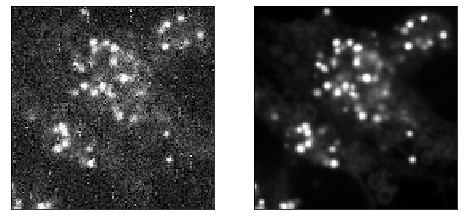

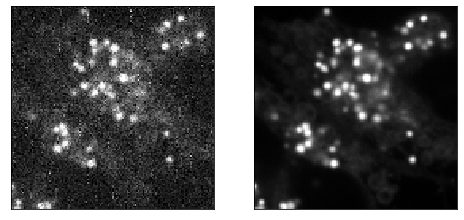

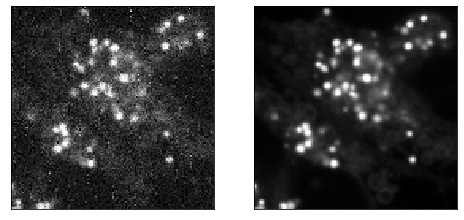

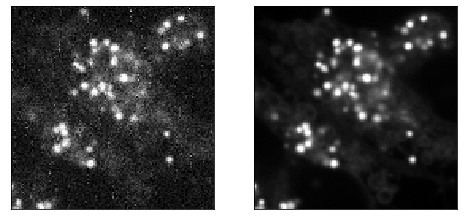

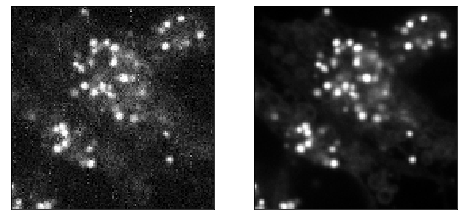

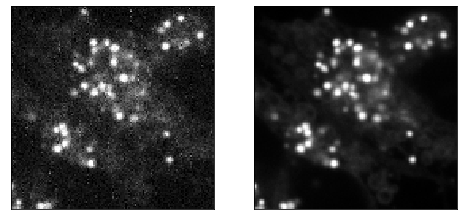

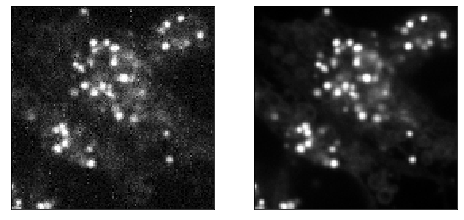

In [10]:
for signal in config['psignal_levels']:
    loader, dataset = load_confocal(config['root'], config['train_stat'], config['batch_size'], 
                                        [signal], config['sample_size_list'][0], split_ratio = 0, 
                                        types=config['types'], captures=config['captures'],
                                        patch_size=config['patch_size'], loader=tiff_loader)
    noisy = dataset[0]
    clean = dataset[1]
    print("Peak signal: ", signal, torch.mean(clean))
    plot_images([noisy[1,0,:], clean[1,0,:]])

Running training with 10 peak signal level...
No. 0...
(10, 1, 128, 128)
[9] loss: 0.01206 val_loss: 0.01159
[19] loss: 0.01089 val_loss: 0.01117
[29] loss: 0.01137 val_loss: 0.01100
[39] loss: 0.01122 val_loss: 0.01094
[49] loss: 0.01043 val_loss: 0.01090
[59] loss: 0.01110 val_loss: 0.01086
[69] loss: 0.01102 val_loss: 0.01085
[79] loss: 0.01027 val_loss: 0.01083
[89] loss: 0.01096 val_loss: 0.01082
[99] loss: 0.01090 val_loss: 0.01081
[109] loss: 0.01016 val_loss: 0.01080
[119] loss: 0.01086 val_loss: 0.01080
[129] loss: 0.01080 val_loss: 0.01080
[139] loss: 0.01007 val_loss: 0.01080
[149] loss: 0.01076 val_loss: 0.01079
[159] loss: 0.01071 val_loss: 0.01080
[169] loss: 0.00999 val_loss: 0.01080
[179] loss: 0.01067 val_loss: 0.01080
[189] loss: 0.01062 val_loss: 0.01081
[199] loss: 0.00991 val_loss: 0.01081
[209] loss: 0.01061 val_loss: 0.01082
[219] loss: 0.01059 val_loss: 0.01082
[229] loss: 0.00987 val_loss: 0.01084
[239] loss: 0.01054 val_loss: 0.01083
early stopping at 250 iter

[219] loss: 0.01056 val_loss: 0.01082
[229] loss: 0.00983 val_loss: 0.01082
[239] loss: 0.01052 val_loss: 0.01082
early stopping at 250 iterations!
[9] loss: 0.02635 val_loss: 0.02305
[19] loss: 0.01466 val_loss: 0.01415
[29] loss: 0.01307 val_loss: 0.01268
[39] loss: 0.01189 val_loss: 0.01201
[49] loss: 0.01106 val_loss: 0.01161
[59] loss: 0.01173 val_loss: 0.01143
[69] loss: 0.01142 val_loss: 0.01128
[79] loss: 0.01067 val_loss: 0.01117
[89] loss: 0.01140 val_loss: 0.01111
[99] loss: 0.01127 val_loss: 0.01105
[109] loss: 0.01056 val_loss: 0.01100
[119] loss: 0.01126 val_loss: 0.01097
[129] loss: 0.01119 val_loss: 0.01093
[139] loss: 0.01051 val_loss: 0.01091
[149] loss: 0.01119 val_loss: 0.01089
[159] loss: 0.01113 val_loss: 0.01088
[169] loss: 0.01046 val_loss: 0.01087
[179] loss: 0.01114 val_loss: 0.01085
[189] loss: 0.01109 val_loss: 0.01084
[199] loss: 0.01042 val_loss: 0.01083
[209] loss: 0.01110 val_loss: 0.01081
[219] loss: 0.01105 val_loss: 0.01080
[229] loss: 0.01038 val_los

[19] loss: 0.01466 val_loss: 0.01415
[29] loss: 0.01307 val_loss: 0.01268
[39] loss: 0.01189 val_loss: 0.01201
[49] loss: 0.01106 val_loss: 0.01161
[59] loss: 0.01173 val_loss: 0.01143
[69] loss: 0.01142 val_loss: 0.01128
[79] loss: 0.01067 val_loss: 0.01117
[89] loss: 0.01140 val_loss: 0.01111
[99] loss: 0.01127 val_loss: 0.01105
[109] loss: 0.01056 val_loss: 0.01100
[119] loss: 0.01126 val_loss: 0.01097
[129] loss: 0.01119 val_loss: 0.01093
[139] loss: 0.01051 val_loss: 0.01091
[149] loss: 0.01119 val_loss: 0.01089
[159] loss: 0.01113 val_loss: 0.01088
[169] loss: 0.01046 val_loss: 0.01087
[179] loss: 0.01114 val_loss: 0.01085
[189] loss: 0.01109 val_loss: 0.01084
[199] loss: 0.01042 val_loss: 0.01083
[209] loss: 0.01109 val_loss: 0.01081
[219] loss: 0.01105 val_loss: 0.01080
[229] loss: 0.01038 val_loss: 0.01080
[239] loss: 0.01106 val_loss: 0.01078
[249] loss: 0.01103 val_loss: 0.01078
[259] loss: 0.01036 val_loss: 0.01077
[269] loss: 0.01102 val_loss: 0.01076
[279] loss: 0.01101 v

[229] loss: 0.00989 val_loss: 0.01081
[239] loss: 0.01059 val_loss: 0.01085
early stopping at 250 iterations!
[9] loss: 0.02635 val_loss: 0.02305
[19] loss: 0.01466 val_loss: 0.01415
[29] loss: 0.01307 val_loss: 0.01268
[39] loss: 0.01189 val_loss: 0.01201
[49] loss: 0.01106 val_loss: 0.01161
[59] loss: 0.01173 val_loss: 0.01143
[69] loss: 0.01142 val_loss: 0.01128
[79] loss: 0.01067 val_loss: 0.01117
[89] loss: 0.01140 val_loss: 0.01111
[99] loss: 0.01127 val_loss: 0.01105
[109] loss: 0.01056 val_loss: 0.01100
[119] loss: 0.01126 val_loss: 0.01097
[129] loss: 0.01119 val_loss: 0.01093
[139] loss: 0.01051 val_loss: 0.01091
[149] loss: 0.01119 val_loss: 0.01089
[159] loss: 0.01113 val_loss: 0.01088
[169] loss: 0.01046 val_loss: 0.01087
[179] loss: 0.01114 val_loss: 0.01085
[189] loss: 0.01109 val_loss: 0.01084
[199] loss: 0.01042 val_loss: 0.01083
[209] loss: 0.01110 val_loss: 0.01081
[219] loss: 0.01105 val_loss: 0.01080
[229] loss: 0.01038 val_loss: 0.01080
[239] loss: 0.01106 val_los

[229] loss: 0.00986 val_loss: 0.01082
[239] loss: 0.01054 val_loss: 0.01082
early stopping at 250 iterations!
[9] loss: 0.02635 val_loss: 0.02305
[19] loss: 0.01466 val_loss: 0.01415
[29] loss: 0.01307 val_loss: 0.01268
[39] loss: 0.01189 val_loss: 0.01201
[49] loss: 0.01106 val_loss: 0.01161
[59] loss: 0.01173 val_loss: 0.01143
[69] loss: 0.01142 val_loss: 0.01128
[79] loss: 0.01067 val_loss: 0.01117
[89] loss: 0.01140 val_loss: 0.01111
[99] loss: 0.01127 val_loss: 0.01105
[109] loss: 0.01056 val_loss: 0.01100
[119] loss: 0.01126 val_loss: 0.01097
[129] loss: 0.01119 val_loss: 0.01093
[139] loss: 0.01051 val_loss: 0.01091
[149] loss: 0.01119 val_loss: 0.01089
[159] loss: 0.01113 val_loss: 0.01088
[169] loss: 0.01046 val_loss: 0.01087
[179] loss: 0.01114 val_loss: 0.01085
[189] loss: 0.01109 val_loss: 0.01084
[199] loss: 0.01042 val_loss: 0.01083
[209] loss: 0.01110 val_loss: 0.01081
[219] loss: 0.01105 val_loss: 0.01080
[229] loss: 0.01038 val_loss: 0.01080
[239] loss: 0.01106 val_los

[269] loss: 0.01102 val_loss: 0.01076
[279] loss: 0.01101 val_loss: 0.01076
[289] loss: 0.01033 val_loss: 0.01075
[299] loss: 0.01100 val_loss: 0.01074
[309] loss: 0.01099 val_loss: 0.01074
[319] loss: 0.01031 val_loss: 0.01074
[329] loss: 0.01098 val_loss: 0.01072
[339] loss: 0.01097 val_loss: 0.01072
[349] loss: 0.01029 val_loss: 0.01072
[359] loss: 0.01096 val_loss: 0.01071
[369] loss: 0.01096 val_loss: 0.01071
[379] loss: 0.01027 val_loss: 0.01071
[389] loss: 0.01094 val_loss: 0.01070
[399] loss: 0.01095 val_loss: 0.01070
[409] loss: 0.01026 val_loss: 0.01069
[419] loss: 0.01093 val_loss: 0.01068
[429] loss: 0.01094 val_loss: 0.01068
[439] loss: 0.01024 val_loss: 0.01068
[449] loss: 0.01091 val_loss: 0.01067
[459] loss: 0.01093 val_loss: 0.01067
[469] loss: 0.01023 val_loss: 0.01067
[479] loss: 0.01090 val_loss: 0.01066
[489] loss: 0.01092 val_loss: 0.01067
[499] loss: 0.01022 val_loss: 0.01067
[509] loss: 0.01089 val_loss: 0.01066
[519] loss: 0.01091 val_loss: 0.01066
[529] loss: 

[239] loss: 0.01056 val_loss: 0.01082
early stopping at 250 iterations!
[9] loss: 0.02635 val_loss: 0.02305
[19] loss: 0.01466 val_loss: 0.01415
[29] loss: 0.01307 val_loss: 0.01268
[39] loss: 0.01189 val_loss: 0.01201
[49] loss: 0.01106 val_loss: 0.01161
[59] loss: 0.01173 val_loss: 0.01143
[69] loss: 0.01142 val_loss: 0.01128
[79] loss: 0.01067 val_loss: 0.01117
[89] loss: 0.01140 val_loss: 0.01111
[99] loss: 0.01127 val_loss: 0.01105
[109] loss: 0.01056 val_loss: 0.01100
[119] loss: 0.01126 val_loss: 0.01097
[129] loss: 0.01119 val_loss: 0.01093
[139] loss: 0.01051 val_loss: 0.01091
[149] loss: 0.01119 val_loss: 0.01089
[159] loss: 0.01113 val_loss: 0.01088
[169] loss: 0.01046 val_loss: 0.01087
[179] loss: 0.01114 val_loss: 0.01085
[189] loss: 0.01109 val_loss: 0.01084
[199] loss: 0.01042 val_loss: 0.01083
[209] loss: 0.01110 val_loss: 0.01081
[219] loss: 0.01105 val_loss: 0.01080
[229] loss: 0.01038 val_loss: 0.01080
[239] loss: 0.01106 val_loss: 0.01078
[249] loss: 0.01103 val_los

[389] loss: 0.01094 val_loss: 0.01070
[399] loss: 0.01095 val_loss: 0.01070
[409] loss: 0.01026 val_loss: 0.01070
[419] loss: 0.01093 val_loss: 0.01068
[429] loss: 0.01094 val_loss: 0.01069
[439] loss: 0.01024 val_loss: 0.01068
[449] loss: 0.01091 val_loss: 0.01067
[459] loss: 0.01093 val_loss: 0.01067
[469] loss: 0.01023 val_loss: 0.01067
[479] loss: 0.01090 val_loss: 0.01066
[489] loss: 0.01092 val_loss: 0.01067
[499] loss: 0.01022 val_loss: 0.01066
[509] loss: 0.01089 val_loss: 0.01066
[519] loss: 0.01091 val_loss: 0.01066
[529] loss: 0.01021 val_loss: 0.01066
[539] loss: 0.01088 val_loss: 0.01065
[549] loss: 0.01091 val_loss: 0.01065
[559] loss: 0.01020 val_loss: 0.01065
[569] loss: 0.01087 val_loss: 0.01064
[579] loss: 0.01090 val_loss: 0.01065
[589] loss: 0.01019 val_loss: 0.01065
[599] loss: 0.01086 val_loss: 0.01064
[609] loss: 0.01089 val_loss: 0.01064
[619] loss: 0.01019 val_loss: 0.01064
[629] loss: 0.01085 val_loss: 0.01063
[639] loss: 0.01088 val_loss: 0.01064
[649] loss: 

[519] loss: 0.01091 val_loss: 0.01066
[529] loss: 0.01021 val_loss: 0.01066
[539] loss: 0.01088 val_loss: 0.01065
[549] loss: 0.01090 val_loss: 0.01065
[559] loss: 0.01020 val_loss: 0.01065
[569] loss: 0.01087 val_loss: 0.01064
[579] loss: 0.01090 val_loss: 0.01065
[589] loss: 0.01019 val_loss: 0.01065
[599] loss: 0.01086 val_loss: 0.01064
[609] loss: 0.01089 val_loss: 0.01064
[619] loss: 0.01019 val_loss: 0.01064
[629] loss: 0.01085 val_loss: 0.01063
[639] loss: 0.01088 val_loss: 0.01064
[649] loss: 0.01018 val_loss: 0.01064
[659] loss: 0.01084 val_loss: 0.01063
[669] loss: 0.01088 val_loss: 0.01064
[679] loss: 0.01017 val_loss: 0.01063
[689] loss: 0.01083 val_loss: 0.01063
[699] loss: 0.01087 val_loss: 0.01063
[709] loss: 0.01016 val_loss: 0.01063
[719] loss: 0.01083 val_loss: 0.01062
[729] loss: 0.01086 val_loss: 0.01063
[739] loss: 0.01015 val_loss: 0.01063
[749] loss: 0.01082 val_loss: 0.01062
[759] loss: 0.01086 val_loss: 0.01063
[769] loss: 0.01015 val_loss: 0.01063
[779] loss: 

[1049] loss: 0.01076 val_loss: 0.01060
[1059] loss: 0.01081 val_loss: 0.01062
[1069] loss: 0.01011 val_loss: 0.01061
[1079] loss: 0.01076 val_loss: 0.01060
[1089] loss: 0.01080 val_loss: 0.01062
[1099] loss: 0.01009 val_loss: 0.01061
[1109] loss: 0.01075 val_loss: 0.01060
[1119] loss: 0.01080 val_loss: 0.01062
[1129] loss: 0.01010 val_loss: 0.01061
[1139] loss: 0.01075 val_loss: 0.01060
[1149] loss: 0.01080 val_loss: 0.01062
[1159] loss: 0.01009 val_loss: 0.01062
[1169] loss: 0.01074 val_loss: 0.01060
[1179] loss: 0.01079 val_loss: 0.01062
[1189] loss: 0.01008 val_loss: 0.01060
[1199] loss: 0.01074 val_loss: 0.01060
[1209] loss: 0.01079 val_loss: 0.01063
[1219] loss: 0.01012 val_loss: 0.01063
[1229] loss: 0.01073 val_loss: 0.01061
[1239] loss: 0.01079 val_loss: 0.01061
[1249] loss: 0.01007 val_loss: 0.01060
[1259] loss: 0.01072 val_loss: 0.01060
early stopping at 1270 iterations!
[9] loss: 0.01350 val_loss: 0.01336
[19] loss: 0.01116 val_loss: 0.01150
[29] loss: 0.01140 val_loss: 0.011

[29] loss: 0.00866 val_loss: 0.00898
[39] loss: 0.00847 val_loss: 0.00883
[49] loss: 0.00888 val_loss: 0.00841
[59] loss: 0.00808 val_loss: 0.00816
[69] loss: 0.00810 val_loss: 0.00809
[79] loss: 0.00762 val_loss: 0.00806
[89] loss: 0.00793 val_loss: 0.00793
[99] loss: 0.00787 val_loss: 0.00787
[109] loss: 0.00744 val_loss: 0.00792
[119] loss: 0.00778 val_loss: 0.00781
[129] loss: 0.00778 val_loss: 0.00778
[139] loss: 0.00730 val_loss: 0.00785
[149] loss: 0.00770 val_loss: 0.00776
[159] loss: 0.00770 val_loss: 0.00771
[169] loss: 0.00721 val_loss: 0.00779
[179] loss: 0.00764 val_loss: 0.00769
[189] loss: 0.00762 val_loss: 0.00765
[199] loss: 0.00714 val_loss: 0.00772
[209] loss: 0.00757 val_loss: 0.00761
[219] loss: 0.00755 val_loss: 0.00759
[229] loss: 0.00707 val_loss: 0.00764
[239] loss: 0.00750 val_loss: 0.00753
[249] loss: 0.00749 val_loss: 0.00759
[259] loss: 0.00703 val_loss: 0.00758
[269] loss: 0.00751 val_loss: 0.00748
[279] loss: 0.00746 val_loss: 0.00803
[289] loss: 0.00795 

[129] loss: 0.01542 val_loss: 0.01249
[139] loss: 0.01303 val_loss: 0.01094
[149] loss: 0.01073 val_loss: 0.01239
[159] loss: 0.01098 val_loss: 0.01108
[169] loss: 0.01093 val_loss: 0.01071
[179] loss: 0.01027 val_loss: 0.01040
[189] loss: 0.01071 val_loss: 0.01022
[199] loss: 0.00980 val_loss: 0.01058
[209] loss: 0.00992 val_loss: 0.00997
[219] loss: 0.01018 val_loss: 0.01007
[229] loss: 0.00908 val_loss: 0.01030
[239] loss: 0.00998 val_loss: 0.00995
[249] loss: 0.01009 val_loss: 0.01074
[259] loss: 0.00987 val_loss: 0.00972
[269] loss: 0.01020 val_loss: 0.01172
[279] loss: 0.01037 val_loss: 0.00979
[289] loss: 0.00909 val_loss: 0.01052
[299] loss: 0.00999 val_loss: 0.00986
[309] loss: 0.00954 val_loss: 0.00983
[319] loss: 0.01010 val_loss: 0.01022
[329] loss: 0.00951 val_loss: 0.00958
[339] loss: 0.00955 val_loss: 0.00965
[349] loss: 0.00862 val_loss: 0.00956
[359] loss: 0.00945 val_loss: 0.00971
[369] loss: 0.00974 val_loss: 0.00949
[379] loss: 0.00824 val_loss: 0.00950
[389] loss: 

[969] loss: 0.00717 val_loss: 0.00724
[979] loss: 0.00673 val_loss: 0.00724
[989] loss: 0.00704 val_loss: 0.00724
[999] loss: 0.00717 val_loss: 0.00724
[1009] loss: 0.00672 val_loss: 0.00724
[1019] loss: 0.00703 val_loss: 0.00724
[1029] loss: 0.00716 val_loss: 0.00724
[1039] loss: 0.00672 val_loss: 0.00724
[1049] loss: 0.00703 val_loss: 0.00724
[1059] loss: 0.00716 val_loss: 0.00724
[1069] loss: 0.00671 val_loss: 0.00724
[1079] loss: 0.00702 val_loss: 0.00724
[1089] loss: 0.00716 val_loss: 0.00724
[1099] loss: 0.00671 val_loss: 0.00724
[1109] loss: 0.00702 val_loss: 0.00724
[1119] loss: 0.00715 val_loss: 0.00724
[1129] loss: 0.00671 val_loss: 0.00724
[1139] loss: 0.00702 val_loss: 0.00724
[1149] loss: 0.00715 val_loss: 0.00724
[1159] loss: 0.00670 val_loss: 0.00724
[1169] loss: 0.00701 val_loss: 0.00724
early stopping at 1180 iterations!
[9] loss: 0.01543 val_loss: 0.01432
[19] loss: 0.01008 val_loss: 0.00974
[29] loss: 0.00879 val_loss: 0.00876
[39] loss: 0.00818 val_loss: 0.00814
[49

[159] loss: 0.00748 val_loss: 0.00780
[169] loss: 0.00700 val_loss: 0.00785
[179] loss: 0.00742 val_loss: 0.00768
[189] loss: 0.00754 val_loss: 0.00831
[199] loss: 0.00715 val_loss: 0.00799
[209] loss: 0.00823 val_loss: 0.00810
[219] loss: 0.00832 val_loss: 0.00873
[229] loss: 0.00746 val_loss: 0.00813
[239] loss: 0.00786 val_loss: 0.00822
[249] loss: 0.00793 val_loss: 0.00783
[259] loss: 0.00716 val_loss: 0.00802
[269] loss: 0.00761 val_loss: 0.00786
[279] loss: 0.00745 val_loss: 0.00766
[289] loss: 0.00691 val_loss: 0.00767
[299] loss: 0.00735 val_loss: 0.00762
[309] loss: 0.00738 val_loss: 0.00762
[319] loss: 0.00684 val_loss: 0.00759
[329] loss: 0.00731 val_loss: 0.00755
[339] loss: 0.00731 val_loss: 0.00781
[349] loss: 0.00711 val_loss: 0.00761
[359] loss: 0.00727 val_loss: 0.00770
[369] loss: 0.00764 val_loss: 0.00761
[379] loss: 0.00685 val_loss: 0.00757
[389] loss: 0.00723 val_loss: 0.00760
[399] loss: 0.00730 val_loss: 0.00751
[409] loss: 0.00689 val_loss: 0.00755
[419] loss: 

[249] loss: 0.00719 val_loss: 0.00722
[259] loss: 0.00676 val_loss: 0.00723
[269] loss: 0.00706 val_loss: 0.00721
[279] loss: 0.00721 val_loss: 0.00722
[289] loss: 0.00682 val_loss: 0.00721
[299] loss: 0.00703 val_loss: 0.00727
[309] loss: 0.00719 val_loss: 0.00721
[319] loss: 0.00673 val_loss: 0.00724
[329] loss: 0.00701 val_loss: 0.00720
[339] loss: 0.00715 val_loss: 0.00723
[349] loss: 0.00671 val_loss: 0.00722
[359] loss: 0.00698 val_loss: 0.00722
[369] loss: 0.00714 val_loss: 0.00724
[379] loss: 0.00670 val_loss: 0.00722
[389] loss: 0.00697 val_loss: 0.00724
[399] loss: 0.00713 val_loss: 0.00725
[409] loss: 0.00669 val_loss: 0.00722
[419] loss: 0.00695 val_loss: 0.00727
early stopping at 430 iterations!
No. 5...
(10, 1, 128, 128)
[9] loss: 0.00828 val_loss: 0.00820
[19] loss: 0.00742 val_loss: 0.00782
[29] loss: 0.00759 val_loss: 0.00765
[39] loss: 0.00749 val_loss: 0.00757
[49] loss: 0.00704 val_loss: 0.00751
[59] loss: 0.00734 val_loss: 0.00748
[69] loss: 0.00734 val_loss: 0.007

[169] loss: 0.00702 val_loss: 0.00746
[179] loss: 0.00735 val_loss: 0.00745
[189] loss: 0.00740 val_loss: 0.00744
[199] loss: 0.00698 val_loss: 0.00743
[209] loss: 0.00731 val_loss: 0.00742
[219] loss: 0.00737 val_loss: 0.00741
[229] loss: 0.00695 val_loss: 0.00740
[239] loss: 0.00729 val_loss: 0.00739
[249] loss: 0.00735 val_loss: 0.00739
[259] loss: 0.00693 val_loss: 0.00738
[269] loss: 0.00727 val_loss: 0.00738
[279] loss: 0.00733 val_loss: 0.00737
[289] loss: 0.00691 val_loss: 0.00736
[299] loss: 0.00725 val_loss: 0.00736
[309] loss: 0.00732 val_loss: 0.00735
[319] loss: 0.00689 val_loss: 0.00734
[329] loss: 0.00723 val_loss: 0.00734
[339] loss: 0.00730 val_loss: 0.00734
[349] loss: 0.00688 val_loss: 0.00733
[359] loss: 0.00721 val_loss: 0.00733
[369] loss: 0.00729 val_loss: 0.00732
[379] loss: 0.00686 val_loss: 0.00732
[389] loss: 0.00720 val_loss: 0.00731
[399] loss: 0.00728 val_loss: 0.00731
[409] loss: 0.00685 val_loss: 0.00731
[419] loss: 0.00718 val_loss: 0.00730
[429] loss: 

[439] loss: 0.00684 val_loss: 0.00730
[449] loss: 0.00717 val_loss: 0.00729
[459] loss: 0.00725 val_loss: 0.00729
[469] loss: 0.00683 val_loss: 0.00729
[479] loss: 0.00716 val_loss: 0.00728
[489] loss: 0.00724 val_loss: 0.00728
[499] loss: 0.00682 val_loss: 0.00728
[509] loss: 0.00714 val_loss: 0.00728
[519] loss: 0.00723 val_loss: 0.00728
[529] loss: 0.00681 val_loss: 0.00727
[539] loss: 0.00713 val_loss: 0.00727
[549] loss: 0.00723 val_loss: 0.00727
[559] loss: 0.00680 val_loss: 0.00727
[569] loss: 0.00712 val_loss: 0.00726
[579] loss: 0.00722 val_loss: 0.00726
[589] loss: 0.00679 val_loss: 0.00726
[599] loss: 0.00711 val_loss: 0.00726
[609] loss: 0.00721 val_loss: 0.00726
[619] loss: 0.00679 val_loss: 0.00726
[629] loss: 0.00711 val_loss: 0.00726
[639] loss: 0.00721 val_loss: 0.00726
[649] loss: 0.00678 val_loss: 0.00725
[659] loss: 0.00710 val_loss: 0.00725
[669] loss: 0.00720 val_loss: 0.00725
[679] loss: 0.00677 val_loss: 0.00725
[689] loss: 0.00709 val_loss: 0.00725
[699] loss: 

[729] loss: 0.00720 val_loss: 0.00725
[739] loss: 0.00676 val_loss: 0.00725
[749] loss: 0.00708 val_loss: 0.00724
[759] loss: 0.00719 val_loss: 0.00725
[769] loss: 0.00676 val_loss: 0.00724
[779] loss: 0.00707 val_loss: 0.00724
[789] loss: 0.00719 val_loss: 0.00725
[799] loss: 0.00675 val_loss: 0.00724
[809] loss: 0.00707 val_loss: 0.00724
[819] loss: 0.00718 val_loss: 0.00724
[829] loss: 0.00675 val_loss: 0.00724
[839] loss: 0.00706 val_loss: 0.00724
[849] loss: 0.00718 val_loss: 0.00724
[859] loss: 0.00674 val_loss: 0.00724
[869] loss: 0.00706 val_loss: 0.00724
[879] loss: 0.00718 val_loss: 0.00724
[889] loss: 0.00674 val_loss: 0.00724
[899] loss: 0.00705 val_loss: 0.00724
[909] loss: 0.00717 val_loss: 0.00724
[919] loss: 0.00673 val_loss: 0.00724
[929] loss: 0.00705 val_loss: 0.00724
[939] loss: 0.00717 val_loss: 0.00724
[949] loss: 0.00673 val_loss: 0.00724
[959] loss: 0.00704 val_loss: 0.00724
[969] loss: 0.00717 val_loss: 0.00724
[979] loss: 0.00673 val_loss: 0.00724
[989] loss: 

[929] loss: 0.00704 val_loss: 0.00724
[939] loss: 0.00717 val_loss: 0.00724
[949] loss: 0.00673 val_loss: 0.00724
[959] loss: 0.00704 val_loss: 0.00724
[969] loss: 0.00717 val_loss: 0.00724
[979] loss: 0.00673 val_loss: 0.00724
[989] loss: 0.00703 val_loss: 0.00724
[999] loss: 0.00716 val_loss: 0.00724
[1009] loss: 0.00672 val_loss: 0.00724
[1019] loss: 0.00703 val_loss: 0.00724
[1029] loss: 0.00716 val_loss: 0.00724
[1039] loss: 0.00672 val_loss: 0.00724
[1049] loss: 0.00703 val_loss: 0.00724
[1059] loss: 0.00716 val_loss: 0.00724
[1069] loss: 0.00672 val_loss: 0.00724
[1079] loss: 0.00702 val_loss: 0.00724
[1089] loss: 0.00716 val_loss: 0.00724
[1099] loss: 0.00671 val_loss: 0.00724
[1109] loss: 0.00702 val_loss: 0.00724
[1119] loss: 0.00715 val_loss: 0.00724
[1129] loss: 0.00671 val_loss: 0.00724
[1139] loss: 0.00701 val_loss: 0.00724
[1149] loss: 0.00715 val_loss: 0.00724
[1159] loss: 0.00670 val_loss: 0.00724
[1169] loss: 0.00701 val_loss: 0.00724
[1179] loss: 0.00715 val_loss: 0.

[59] loss: 0.00758 val_loss: 0.00760
[69] loss: 0.00682 val_loss: 0.00664
[79] loss: 0.00629 val_loss: 0.00601
[89] loss: 0.00588 val_loss: 0.00581
[99] loss: 0.00575 val_loss: 0.00607
[109] loss: 0.00573 val_loss: 0.00582
[119] loss: 0.00562 val_loss: 0.00560
[129] loss: 0.00560 val_loss: 0.00565
[139] loss: 0.00524 val_loss: 0.00551
[149] loss: 0.00560 val_loss: 0.00547
[159] loss: 0.00546 val_loss: 0.00586
[169] loss: 0.00569 val_loss: 0.00575
[179] loss: 0.00552 val_loss: 0.00548
[189] loss: 0.00541 val_loss: 0.00538
[199] loss: 0.00505 val_loss: 0.00538
[209] loss: 0.00531 val_loss: 0.00530
[219] loss: 0.00538 val_loss: 0.00529
[229] loss: 0.00498 val_loss: 0.00533
[239] loss: 0.00529 val_loss: 0.00525
[249] loss: 0.00528 val_loss: 0.00527
[259] loss: 0.00502 val_loss: 0.00529
[269] loss: 0.00525 val_loss: 0.00524
[279] loss: 0.00527 val_loss: 0.00521
[289] loss: 0.00491 val_loss: 0.00525
[299] loss: 0.00521 val_loss: 0.00520
[309] loss: 0.00524 val_loss: 0.00520
[319] loss: 0.004

[29] loss: 0.00628 val_loss: 0.00661
[39] loss: 0.00570 val_loss: 0.00638
[49] loss: 0.00539 val_loss: 0.00603
[59] loss: 0.00582 val_loss: 0.00597
[69] loss: 0.00540 val_loss: 0.00600
[79] loss: 0.00519 val_loss: 0.00584
[89] loss: 0.00563 val_loss: 0.00576
[99] loss: 0.00537 val_loss: 0.00588
[109] loss: 0.00513 val_loss: 0.00571
[119] loss: 0.00561 val_loss: 0.00566
[129] loss: 0.00537 val_loss: 0.00567
[139] loss: 0.00515 val_loss: 0.00564
[149] loss: 0.00561 val_loss: 0.00559
[159] loss: 0.00527 val_loss: 0.00561
[169] loss: 0.00505 val_loss: 0.00556
[179] loss: 0.00545 val_loss: 0.00553
[189] loss: 0.00523 val_loss: 0.00552
[199] loss: 0.00502 val_loss: 0.00552
[209] loss: 0.00558 val_loss: 0.00559
[219] loss: 0.00522 val_loss: 0.00553
[229] loss: 0.00517 val_loss: 0.00555
[239] loss: 0.00579 val_loss: 0.00553
[249] loss: 0.00521 val_loss: 0.00569
[259] loss: 0.00502 val_loss: 0.00550
[269] loss: 0.00551 val_loss: 0.00550
[279] loss: 0.00532 val_loss: 0.00576
[289] loss: 0.00499 

[79] loss: 0.00556 val_loss: 0.00665
[89] loss: 0.00632 val_loss: 0.00648
[99] loss: 0.00557 val_loss: 0.00637
[109] loss: 0.00532 val_loss: 0.00627
[119] loss: 0.00585 val_loss: 0.00620
[129] loss: 0.00535 val_loss: 0.00617
[139] loss: 0.00513 val_loss: 0.00615
[149] loss: 0.00550 val_loss: 0.00602
[159] loss: 0.00531 val_loss: 0.00598
[169] loss: 0.00510 val_loss: 0.00603
[179] loss: 0.00544 val_loss: 0.00598
[189] loss: 0.00525 val_loss: 0.00589
[199] loss: 0.00500 val_loss: 0.00594
[209] loss: 0.00533 val_loss: 0.00589
[219] loss: 0.00521 val_loss: 0.00584
[229] loss: 0.00496 val_loss: 0.00590
[239] loss: 0.00527 val_loss: 0.00586
[249] loss: 0.00518 val_loss: 0.00580
[259] loss: 0.00497 val_loss: 0.00596
[269] loss: 0.00565 val_loss: 0.00591
[279] loss: 0.00542 val_loss: 0.00646
[289] loss: 0.00500 val_loss: 0.00588
[299] loss: 0.00528 val_loss: 0.00588
[309] loss: 0.00517 val_loss: 0.00582
[319] loss: 0.00497 val_loss: 0.00581
[329] loss: 0.00521 val_loss: 0.00581
[339] loss: 0.0

[1079] loss: 0.00509 val_loss: 0.00516
[1089] loss: 0.00506 val_loss: 0.00516
[1099] loss: 0.00480 val_loss: 0.00516
[1109] loss: 0.00509 val_loss: 0.00516
[1119] loss: 0.00506 val_loss: 0.00516
[1129] loss: 0.00480 val_loss: 0.00516
[1139] loss: 0.00509 val_loss: 0.00516
[1149] loss: 0.00506 val_loss: 0.00516
[1159] loss: 0.00480 val_loss: 0.00516
[1169] loss: 0.00509 val_loss: 0.00516
[1179] loss: 0.00505 val_loss: 0.00516
[1189] loss: 0.00480 val_loss: 0.00516
[1199] loss: 0.00509 val_loss: 0.00516
[1209] loss: 0.00505 val_loss: 0.00516
[1219] loss: 0.00479 val_loss: 0.00516
[1229] loss: 0.00508 val_loss: 0.00516
[1239] loss: 0.00505 val_loss: 0.00516
[1249] loss: 0.00478 val_loss: 0.00516
[1259] loss: 0.00508 val_loss: 0.00516
[1269] loss: 0.00505 val_loss: 0.00516
[1279] loss: 0.00478 val_loss: 0.00516
[1289] loss: 0.00507 val_loss: 0.00516
[1299] loss: 0.00504 val_loss: 0.00516
[1309] loss: 0.00478 val_loss: 0.00516
[1319] loss: 0.00507 val_loss: 0.00516
[1329] loss: 0.00504 val_

[529] loss: 0.00486 val_loss: 0.00520
[539] loss: 0.00517 val_loss: 0.00519
[549] loss: 0.00512 val_loss: 0.00519
[559] loss: 0.00486 val_loss: 0.00519
[569] loss: 0.00516 val_loss: 0.00519
[579] loss: 0.00512 val_loss: 0.00519
[589] loss: 0.00485 val_loss: 0.00519
[599] loss: 0.00516 val_loss: 0.00519
[609] loss: 0.00511 val_loss: 0.00519
[619] loss: 0.00485 val_loss: 0.00518
[629] loss: 0.00515 val_loss: 0.00518
[639] loss: 0.00511 val_loss: 0.00518
[649] loss: 0.00484 val_loss: 0.00518
[659] loss: 0.00515 val_loss: 0.00518
[669] loss: 0.00511 val_loss: 0.00518
[679] loss: 0.00484 val_loss: 0.00518
[689] loss: 0.00514 val_loss: 0.00518
[699] loss: 0.00510 val_loss: 0.00518
[709] loss: 0.00483 val_loss: 0.00518
[719] loss: 0.00514 val_loss: 0.00517
[729] loss: 0.00510 val_loss: 0.00518
[739] loss: 0.00483 val_loss: 0.00517
[749] loss: 0.00513 val_loss: 0.00517
[759] loss: 0.00509 val_loss: 0.00517
[769] loss: 0.00483 val_loss: 0.00517
[779] loss: 0.00513 val_loss: 0.00517
[789] loss: 

[499] loss: 0.00487 val_loss: 0.00520
[509] loss: 0.00517 val_loss: 0.00520
[519] loss: 0.00513 val_loss: 0.00520
[529] loss: 0.00486 val_loss: 0.00520
[539] loss: 0.00517 val_loss: 0.00519
[549] loss: 0.00512 val_loss: 0.00519
[559] loss: 0.00486 val_loss: 0.00519
[569] loss: 0.00516 val_loss: 0.00519
[579] loss: 0.00512 val_loss: 0.00519
[589] loss: 0.00485 val_loss: 0.00519
[599] loss: 0.00516 val_loss: 0.00519
[609] loss: 0.00511 val_loss: 0.00519
[619] loss: 0.00485 val_loss: 0.00518
[629] loss: 0.00515 val_loss: 0.00518
[639] loss: 0.00511 val_loss: 0.00518
[649] loss: 0.00484 val_loss: 0.00518
[659] loss: 0.00515 val_loss: 0.00518
[669] loss: 0.00511 val_loss: 0.00518
[679] loss: 0.00484 val_loss: 0.00518
[689] loss: 0.00514 val_loss: 0.00518
[699] loss: 0.00510 val_loss: 0.00518
[709] loss: 0.00483 val_loss: 0.00518
[719] loss: 0.00514 val_loss: 0.00517
[729] loss: 0.00510 val_loss: 0.00518
[739] loss: 0.00483 val_loss: 0.00517
[749] loss: 0.00513 val_loss: 0.00517
[759] loss: 

[389] loss: 0.00521 val_loss: 0.00523
[399] loss: 0.00516 val_loss: 0.00522
[409] loss: 0.00488 val_loss: 0.00522
[419] loss: 0.00520 val_loss: 0.00522
[429] loss: 0.00515 val_loss: 0.00522
[439] loss: 0.00488 val_loss: 0.00521
[449] loss: 0.00519 val_loss: 0.00521
[459] loss: 0.00514 val_loss: 0.00521
[469] loss: 0.00487 val_loss: 0.00521
[479] loss: 0.00518 val_loss: 0.00520
[489] loss: 0.00514 val_loss: 0.00520
[499] loss: 0.00487 val_loss: 0.00520
[509] loss: 0.00517 val_loss: 0.00520
[519] loss: 0.00513 val_loss: 0.00520
[529] loss: 0.00486 val_loss: 0.00520
[539] loss: 0.00517 val_loss: 0.00519
[549] loss: 0.00512 val_loss: 0.00519
[559] loss: 0.00486 val_loss: 0.00519
[569] loss: 0.00516 val_loss: 0.00519
[579] loss: 0.00512 val_loss: 0.00519
[589] loss: 0.00485 val_loss: 0.00519
[599] loss: 0.00516 val_loss: 0.00519
[609] loss: 0.00511 val_loss: 0.00519
[619] loss: 0.00485 val_loss: 0.00518
[629] loss: 0.00515 val_loss: 0.00518
[639] loss: 0.00511 val_loss: 0.00518
[649] loss: 

[209] loss: 0.00529 val_loss: 0.00531
[219] loss: 0.00524 val_loss: 0.00530
[229] loss: 0.00495 val_loss: 0.00529
[239] loss: 0.00527 val_loss: 0.00529
[249] loss: 0.00522 val_loss: 0.00528
[259] loss: 0.00493 val_loss: 0.00528
[269] loss: 0.00525 val_loss: 0.00527
[279] loss: 0.00520 val_loss: 0.00527
[289] loss: 0.00492 val_loss: 0.00526
[299] loss: 0.00524 val_loss: 0.00526
[309] loss: 0.00519 val_loss: 0.00525
[319] loss: 0.00491 val_loss: 0.00525
[329] loss: 0.00523 val_loss: 0.00525
[339] loss: 0.00518 val_loss: 0.00524
[349] loss: 0.00490 val_loss: 0.00524
[359] loss: 0.00522 val_loss: 0.00523
[369] loss: 0.00517 val_loss: 0.00523
[379] loss: 0.00489 val_loss: 0.00523
[389] loss: 0.00521 val_loss: 0.00523
[399] loss: 0.00516 val_loss: 0.00522
[409] loss: 0.00488 val_loss: 0.00522
[419] loss: 0.00520 val_loss: 0.00522
[429] loss: 0.00515 val_loss: 0.00522
[439] loss: 0.00488 val_loss: 0.00521
[449] loss: 0.00519 val_loss: 0.00521
[459] loss: 0.00514 val_loss: 0.00521
[469] loss: 

[119] loss: 0.00515 val_loss: 0.00534
[129] loss: 0.00508 val_loss: 0.00534
[139] loss: 0.00478 val_loss: 0.00534
[149] loss: 0.00509 val_loss: 0.00533
[159] loss: 0.00502 val_loss: 0.00534
[169] loss: 0.00473 val_loss: 0.00533
[179] loss: 0.00505 val_loss: 0.00534
[189] loss: 0.00498 val_loss: 0.00534
[199] loss: 0.00470 val_loss: 0.00534
[209] loss: 0.00502 val_loss: 0.00534
[219] loss: 0.00495 val_loss: 0.00534
[229] loss: 0.00467 val_loss: 0.00535
[239] loss: 0.00498 val_loss: 0.00535
early stopping at 250 iterations!
[9] loss: 0.01348 val_loss: 0.01184
[19] loss: 0.00683 val_loss: 0.00701
[29] loss: 0.00646 val_loss: 0.00645
[39] loss: 0.00577 val_loss: 0.00593
[49] loss: 0.00536 val_loss: 0.00575
[59] loss: 0.00557 val_loss: 0.00562
[69] loss: 0.00549 val_loss: 0.00556
[79] loss: 0.00515 val_loss: 0.00551
[89] loss: 0.00544 val_loss: 0.00548
[99] loss: 0.00537 val_loss: 0.00546
[109] loss: 0.00507 val_loss: 0.00543
[119] loss: 0.00539 val_loss: 0.00541
[129] loss: 0.00532 val_los

[609] loss: 0.00512 val_loss: 0.00569
[619] loss: 0.00483 val_loss: 0.00570
[629] loss: 0.00515 val_loss: 0.00569
[639] loss: 0.00511 val_loss: 0.00569
[649] loss: 0.00482 val_loss: 0.00570
[659] loss: 0.00515 val_loss: 0.00568
[669] loss: 0.00510 val_loss: 0.00569
[679] loss: 0.00483 val_loss: 0.00570
[689] loss: 0.00516 val_loss: 0.00568
[699] loss: 0.00509 val_loss: 0.00570
[709] loss: 0.00484 val_loss: 0.00570
[719] loss: 0.00515 val_loss: 0.00568
[729] loss: 0.00509 val_loss: 0.00569
[739] loss: 0.00483 val_loss: 0.00569
[749] loss: 0.00514 val_loss: 0.00568
[759] loss: 0.00508 val_loss: 0.00568
[769] loss: 0.00482 val_loss: 0.00568
[779] loss: 0.00513 val_loss: 0.00567
[789] loss: 0.00507 val_loss: 0.00567
[799] loss: 0.00481 val_loss: 0.00568
[809] loss: 0.00513 val_loss: 0.00566
[819] loss: 0.00507 val_loss: 0.00568
[829] loss: 0.00481 val_loss: 0.00567
[839] loss: 0.00514 val_loss: 0.00566
[849] loss: 0.00506 val_loss: 0.00573
[859] loss: 0.00484 val_loss: 0.00567
[869] loss: 

[149] loss: 0.00565 val_loss: 0.00580
[159] loss: 0.00549 val_loss: 0.00574
[169] loss: 0.00535 val_loss: 0.00582
[179] loss: 0.00558 val_loss: 0.00571
[189] loss: 0.00540 val_loss: 0.00566
[199] loss: 0.00522 val_loss: 0.00570
[209] loss: 0.00548 val_loss: 0.00560
[219] loss: 0.00532 val_loss: 0.00555
[229] loss: 0.00511 val_loss: 0.00558
[239] loss: 0.00538 val_loss: 0.00550
[249] loss: 0.00524 val_loss: 0.00546
[259] loss: 0.00503 val_loss: 0.00549
[269] loss: 0.00530 val_loss: 0.00542
[279] loss: 0.00520 val_loss: 0.00541
[289] loss: 0.00496 val_loss: 0.00542
[299] loss: 0.00525 val_loss: 0.00537
[309] loss: 0.00519 val_loss: 0.00550
[319] loss: 0.00503 val_loss: 0.00538
[329] loss: 0.00543 val_loss: 0.00562
[339] loss: 0.00572 val_loss: 0.00539
[349] loss: 0.00493 val_loss: 0.00542
[359] loss: 0.00522 val_loss: 0.00538
[369] loss: 0.00513 val_loss: 0.00534
[379] loss: 0.00490 val_loss: 0.00535
[389] loss: 0.00519 val_loss: 0.00532
[399] loss: 0.00512 val_loss: 0.00531
[409] loss: 

[1239] loss: 0.00390 val_loss: 0.00400
[1249] loss: 0.00365 val_loss: 0.00400
[1259] loss: 0.00378 val_loss: 0.00400
[1269] loss: 0.00390 val_loss: 0.00400
[1279] loss: 0.00365 val_loss: 0.00400
[1289] loss: 0.00378 val_loss: 0.00400
[1299] loss: 0.00390 val_loss: 0.00400
[1309] loss: 0.00365 val_loss: 0.00399
[1319] loss: 0.00378 val_loss: 0.00399
[1329] loss: 0.00389 val_loss: 0.00400
[1339] loss: 0.00364 val_loss: 0.00399
[1349] loss: 0.00377 val_loss: 0.00399
[1359] loss: 0.00389 val_loss: 0.00400
[1369] loss: 0.00364 val_loss: 0.00400
[1379] loss: 0.00377 val_loss: 0.00400
[1389] loss: 0.00389 val_loss: 0.00400
[1399] loss: 0.00364 val_loss: 0.00400
[1409] loss: 0.00377 val_loss: 0.00399
[1419] loss: 0.00389 val_loss: 0.00399
[1429] loss: 0.00364 val_loss: 0.00399
[1439] loss: 0.00377 val_loss: 0.00399
[1449] loss: 0.00389 val_loss: 0.00399
[1459] loss: 0.00363 val_loss: 0.00399
[1469] loss: 0.00376 val_loss: 0.00399
[1479] loss: 0.00388 val_loss: 0.00400
[1489] loss: 0.00364 val_

[1239] loss: 0.00390 val_loss: 0.00400
[1249] loss: 0.00365 val_loss: 0.00400
[1259] loss: 0.00378 val_loss: 0.00400
[1269] loss: 0.00390 val_loss: 0.00400
[1279] loss: 0.00365 val_loss: 0.00400
[1289] loss: 0.00378 val_loss: 0.00400
[1299] loss: 0.00390 val_loss: 0.00400
[1309] loss: 0.00365 val_loss: 0.00400
[1319] loss: 0.00378 val_loss: 0.00400
[1329] loss: 0.00389 val_loss: 0.00400
[1339] loss: 0.00365 val_loss: 0.00400
[1349] loss: 0.00377 val_loss: 0.00399
[1359] loss: 0.00389 val_loss: 0.00399
[1369] loss: 0.00364 val_loss: 0.00399
[1379] loss: 0.00377 val_loss: 0.00399
[1389] loss: 0.00389 val_loss: 0.00399
[1399] loss: 0.00364 val_loss: 0.00399
[1409] loss: 0.00377 val_loss: 0.00399
[1419] loss: 0.00389 val_loss: 0.00400
[1429] loss: 0.00364 val_loss: 0.00400
[1439] loss: 0.00377 val_loss: 0.00400
[1449] loss: 0.00389 val_loss: 0.00400
[1459] loss: 0.00364 val_loss: 0.00400
[1469] loss: 0.00376 val_loss: 0.00399
[1479] loss: 0.00388 val_loss: 0.00399
[1489] loss: 0.00363 val_

[899] loss: 0.00381 val_loss: 0.00400
[909] loss: 0.00393 val_loss: 0.00400
[919] loss: 0.00367 val_loss: 0.00400
[929] loss: 0.00381 val_loss: 0.00400
[939] loss: 0.00393 val_loss: 0.00400
[949] loss: 0.00367 val_loss: 0.00400
[959] loss: 0.00381 val_loss: 0.00400
[969] loss: 0.00392 val_loss: 0.00400
[979] loss: 0.00367 val_loss: 0.00400
[989] loss: 0.00381 val_loss: 0.00400
[999] loss: 0.00392 val_loss: 0.00400
[1009] loss: 0.00367 val_loss: 0.00400
[1019] loss: 0.00380 val_loss: 0.00400
[1029] loss: 0.00392 val_loss: 0.00400
[1039] loss: 0.00367 val_loss: 0.00400
[1049] loss: 0.00380 val_loss: 0.00400
[1059] loss: 0.00392 val_loss: 0.00400
[1069] loss: 0.00366 val_loss: 0.00400
[1079] loss: 0.00380 val_loss: 0.00400
[1089] loss: 0.00391 val_loss: 0.00400
[1099] loss: 0.00366 val_loss: 0.00400
[1109] loss: 0.00380 val_loss: 0.00400
[1119] loss: 0.00391 val_loss: 0.00400
[1129] loss: 0.00366 val_loss: 0.00400
[1139] loss: 0.00379 val_loss: 0.00400
[1149] loss: 0.00391 val_loss: 0.004

[579] loss: 0.00397 val_loss: 0.00402
[589] loss: 0.00371 val_loss: 0.00401
[599] loss: 0.00385 val_loss: 0.00401
[609] loss: 0.00396 val_loss: 0.00401
[619] loss: 0.00371 val_loss: 0.00401
[629] loss: 0.00384 val_loss: 0.00401
[639] loss: 0.00396 val_loss: 0.00401
[649] loss: 0.00370 val_loss: 0.00401
[659] loss: 0.00384 val_loss: 0.00401
[669] loss: 0.00395 val_loss: 0.00401
[679] loss: 0.00370 val_loss: 0.00401
[689] loss: 0.00384 val_loss: 0.00401
[699] loss: 0.00395 val_loss: 0.00401
[709] loss: 0.00369 val_loss: 0.00401
[719] loss: 0.00383 val_loss: 0.00401
[729] loss: 0.00395 val_loss: 0.00401
[739] loss: 0.00369 val_loss: 0.00400
[749] loss: 0.00383 val_loss: 0.00400
[759] loss: 0.00394 val_loss: 0.00401
[769] loss: 0.00369 val_loss: 0.00400
[779] loss: 0.00383 val_loss: 0.00400
[789] loss: 0.00394 val_loss: 0.00400
[799] loss: 0.00368 val_loss: 0.00400
[809] loss: 0.00382 val_loss: 0.00400
[819] loss: 0.00394 val_loss: 0.00400
[829] loss: 0.00368 val_loss: 0.00400
[839] loss: 

[469] loss: 0.00373 val_loss: 0.00402
[479] loss: 0.00387 val_loss: 0.00402
[489] loss: 0.00398 val_loss: 0.00402
[499] loss: 0.00372 val_loss: 0.00402
[509] loss: 0.00386 val_loss: 0.00402
[519] loss: 0.00398 val_loss: 0.00402
[529] loss: 0.00372 val_loss: 0.00402
[539] loss: 0.00386 val_loss: 0.00402
[549] loss: 0.00397 val_loss: 0.00402
[559] loss: 0.00371 val_loss: 0.00402
[569] loss: 0.00385 val_loss: 0.00401
[579] loss: 0.00397 val_loss: 0.00401
[589] loss: 0.00371 val_loss: 0.00401
[599] loss: 0.00385 val_loss: 0.00401
[609] loss: 0.00396 val_loss: 0.00401
[619] loss: 0.00371 val_loss: 0.00401
[629] loss: 0.00384 val_loss: 0.00401
[639] loss: 0.00396 val_loss: 0.00401
[649] loss: 0.00370 val_loss: 0.00401
[659] loss: 0.00384 val_loss: 0.00401
[669] loss: 0.00395 val_loss: 0.00401
[679] loss: 0.00370 val_loss: 0.00401
[689] loss: 0.00384 val_loss: 0.00401
[699] loss: 0.00395 val_loss: 0.00401
[709] loss: 0.00369 val_loss: 0.00401
[719] loss: 0.00383 val_loss: 0.00401
[729] loss: 

[159] loss: 0.00410 val_loss: 0.00415
[169] loss: 0.00383 val_loss: 0.00414
[179] loss: 0.00398 val_loss: 0.00413
[189] loss: 0.00408 val_loss: 0.00412
[199] loss: 0.00381 val_loss: 0.00411
[209] loss: 0.00395 val_loss: 0.00411
[219] loss: 0.00406 val_loss: 0.00410
[229] loss: 0.00380 val_loss: 0.00409
[239] loss: 0.00394 val_loss: 0.00409
[249] loss: 0.00405 val_loss: 0.00408
[259] loss: 0.00378 val_loss: 0.00408
[269] loss: 0.00392 val_loss: 0.00407
[279] loss: 0.00404 val_loss: 0.00407
[289] loss: 0.00377 val_loss: 0.00407
[299] loss: 0.00391 val_loss: 0.00406
[309] loss: 0.00403 val_loss: 0.00406
[319] loss: 0.00376 val_loss: 0.00406
[329] loss: 0.00390 val_loss: 0.00405
[339] loss: 0.00402 val_loss: 0.00405
[349] loss: 0.00375 val_loss: 0.00405
[359] loss: 0.00389 val_loss: 0.00404
[369] loss: 0.00401 val_loss: 0.00404
[379] loss: 0.00375 val_loss: 0.00404
[389] loss: 0.00389 val_loss: 0.00404
[399] loss: 0.00400 val_loss: 0.00404
[409] loss: 0.00374 val_loss: 0.00403
[419] loss: 

[149] loss: 0.00384 val_loss: 0.00408
[159] loss: 0.00389 val_loss: 0.00408
[169] loss: 0.00366 val_loss: 0.00408
[179] loss: 0.00380 val_loss: 0.00408
[189] loss: 0.00385 val_loss: 0.00409
[199] loss: 0.00363 val_loss: 0.00409
[209] loss: 0.00377 val_loss: 0.00409
[219] loss: 0.00382 val_loss: 0.00409
[229] loss: 0.00361 val_loss: 0.00409
[239] loss: 0.00375 val_loss: 0.00410
early stopping at 250 iterations!
[9] loss: 0.00992 val_loss: 0.00830
[19] loss: 0.00507 val_loss: 0.00528
[29] loss: 0.00476 val_loss: 0.00486
[39] loss: 0.00458 val_loss: 0.00462
[49] loss: 0.00415 val_loss: 0.00447
[59] loss: 0.00421 val_loss: 0.00440
[69] loss: 0.00426 val_loss: 0.00434
[79] loss: 0.00397 val_loss: 0.00430
[89] loss: 0.00410 val_loss: 0.00427
[99] loss: 0.00418 val_loss: 0.00424
[109] loss: 0.00389 val_loss: 0.00422
[119] loss: 0.00404 val_loss: 0.00420
[129] loss: 0.00414 val_loss: 0.00419
[139] loss: 0.00385 val_loss: 0.00417
[149] loss: 0.00401 val_loss: 0.00416
[159] loss: 0.00411 val_los

[49] loss: 0.00391 val_loss: 0.00418
[59] loss: 0.00401 val_loss: 0.00415
[69] loss: 0.00407 val_loss: 0.00413
[79] loss: 0.00380 val_loss: 0.00411
[89] loss: 0.00393 val_loss: 0.00410
[99] loss: 0.00399 val_loss: 0.00410
[109] loss: 0.00374 val_loss: 0.00409
[119] loss: 0.00388 val_loss: 0.00409
[129] loss: 0.00393 val_loss: 0.00409
[139] loss: 0.00370 val_loss: 0.00409
[149] loss: 0.00384 val_loss: 0.00408
[159] loss: 0.00389 val_loss: 0.00408
[169] loss: 0.00366 val_loss: 0.00408
[179] loss: 0.00380 val_loss: 0.00408
[189] loss: 0.00385 val_loss: 0.00409
[199] loss: 0.00363 val_loss: 0.00409
[209] loss: 0.00377 val_loss: 0.00409
[219] loss: 0.00382 val_loss: 0.00409
[229] loss: 0.00361 val_loss: 0.00409
[239] loss: 0.00375 val_loss: 0.00410
early stopping at 250 iterations!
[9] loss: 0.00992 val_loss: 0.00830
[19] loss: 0.00507 val_loss: 0.00528
[29] loss: 0.00476 val_loss: 0.00486
[39] loss: 0.00458 val_loss: 0.00462
[49] loss: 0.00415 val_loss: 0.00447
[59] loss: 0.00421 val_loss:

[189] loss: 0.00411 val_loss: 0.00498
[199] loss: 0.00401 val_loss: 0.00468
[209] loss: 0.00428 val_loss: 0.00501
[219] loss: 0.00452 val_loss: 0.00463
[229] loss: 0.00391 val_loss: 0.00509
[239] loss: 0.00415 val_loss: 0.00470
[249] loss: 0.00407 val_loss: 0.00458
[259] loss: 0.00376 val_loss: 0.00463
[269] loss: 0.00397 val_loss: 0.00458
[279] loss: 0.00403 val_loss: 0.00457
[289] loss: 0.00379 val_loss: 0.00458
[299] loss: 0.00399 val_loss: 0.00457
[309] loss: 0.00401 val_loss: 0.00456
[319] loss: 0.00383 val_loss: 0.00454
[329] loss: 0.00402 val_loss: 0.00454
[339] loss: 0.00401 val_loss: 0.00458
[349] loss: 0.00396 val_loss: 0.00455
[359] loss: 0.00407 val_loss: 0.00454
[369] loss: 0.00402 val_loss: 0.00471
[379] loss: 0.00399 val_loss: 0.00452
[389] loss: 0.00430 val_loss: 0.00470
[399] loss: 0.00421 val_loss: 0.00493
[409] loss: 0.00466 val_loss: 0.00533
[419] loss: 0.00408 val_loss: 0.00454
[429] loss: 0.00421 val_loss: 0.00466
[439] loss: 0.00383 val_loss: 0.00453
[449] loss: 

[1479] loss: 0.00388 val_loss: 0.00400
[1489] loss: 0.00364 val_loss: 0.00400
[1499] loss: 0.00376 val_loss: 0.00399
early stopping at 1510 iterations!
[9] loss: 0.01124 val_loss: 0.01145
[19] loss: 0.00997 val_loss: 0.00906
[29] loss: 0.00648 val_loss: 0.00631
[39] loss: 0.00491 val_loss: 0.00574
[49] loss: 0.00491 val_loss: 0.00522
[59] loss: 0.00465 val_loss: 0.00464
[69] loss: 0.00455 val_loss: 0.00445
[79] loss: 0.00434 val_loss: 0.00449
[89] loss: 0.00432 val_loss: 0.00437
[99] loss: 0.00438 val_loss: 0.00435
[109] loss: 0.00436 val_loss: 0.00453
[119] loss: 0.00426 val_loss: 0.00426
[129] loss: 0.00421 val_loss: 0.00434
[139] loss: 0.00427 val_loss: 0.00427
[149] loss: 0.00411 val_loss: 0.00436
[159] loss: 0.00424 val_loss: 0.00438
[169] loss: 0.00519 val_loss: 0.00448
[179] loss: 0.00431 val_loss: 0.00431
[189] loss: 0.00415 val_loss: 0.00417
[199] loss: 0.00395 val_loss: 0.00411
[209] loss: 0.00402 val_loss: 0.00409
[219] loss: 0.00403 val_loss: 0.00419
[229] loss: 0.00406 val

[1299] loss: 0.00390 val_loss: 0.00400
[1309] loss: 0.00364 val_loss: 0.00399
[1319] loss: 0.00378 val_loss: 0.00399
[1329] loss: 0.00389 val_loss: 0.00400
[1339] loss: 0.00364 val_loss: 0.00399
[1349] loss: 0.00377 val_loss: 0.00399
[1359] loss: 0.00389 val_loss: 0.00400
[1369] loss: 0.00365 val_loss: 0.00400
[1379] loss: 0.00377 val_loss: 0.00400
[1389] loss: 0.00389 val_loss: 0.00400
[1399] loss: 0.00364 val_loss: 0.00400
[1409] loss: 0.00377 val_loss: 0.00399
[1419] loss: 0.00389 val_loss: 0.00399
[1429] loss: 0.00363 val_loss: 0.00399
[1439] loss: 0.00377 val_loss: 0.00399
[1449] loss: 0.00389 val_loss: 0.00400
[1459] loss: 0.00363 val_loss: 0.00399
[1469] loss: 0.00376 val_loss: 0.00399
[1479] loss: 0.00388 val_loss: 0.00400
[1489] loss: 0.00364 val_loss: 0.00400
[1499] loss: 0.00376 val_loss: 0.00400
[1509] loss: 0.00388 val_loss: 0.00400
[1519] loss: 0.00364 val_loss: 0.00400
[1529] loss: 0.00376 val_loss: 0.00399
[1539] loss: 0.00388 val_loss: 0.00399
[1549] loss: 0.00363 val_

[679] loss: 0.00286 val_loss: 0.00304
[689] loss: 0.00306 val_loss: 0.00304
[699] loss: 0.00304 val_loss: 0.00304
[709] loss: 0.00286 val_loss: 0.00303
[719] loss: 0.00306 val_loss: 0.00304
[729] loss: 0.00304 val_loss: 0.00303
[739] loss: 0.00286 val_loss: 0.00303
[749] loss: 0.00305 val_loss: 0.00304
[759] loss: 0.00304 val_loss: 0.00303
[769] loss: 0.00285 val_loss: 0.00303
[779] loss: 0.00305 val_loss: 0.00304
[789] loss: 0.00304 val_loss: 0.00303
[799] loss: 0.00285 val_loss: 0.00303
[809] loss: 0.00305 val_loss: 0.00303
[819] loss: 0.00303 val_loss: 0.00303
[829] loss: 0.00285 val_loss: 0.00303
[839] loss: 0.00305 val_loss: 0.00303
[849] loss: 0.00303 val_loss: 0.00303
[859] loss: 0.00285 val_loss: 0.00303
[869] loss: 0.00304 val_loss: 0.00303
[879] loss: 0.00303 val_loss: 0.00303
[889] loss: 0.00285 val_loss: 0.00303
[899] loss: 0.00304 val_loss: 0.00303
[909] loss: 0.00303 val_loss: 0.00303
[919] loss: 0.00284 val_loss: 0.00303
[929] loss: 0.00304 val_loss: 0.00303
[939] loss: 

[1019] loss: 0.00303 val_loss: 0.00303
[1029] loss: 0.00302 val_loss: 0.00303
[1039] loss: 0.00284 val_loss: 0.00302
[1049] loss: 0.00303 val_loss: 0.00303
[1059] loss: 0.00302 val_loss: 0.00303
[1069] loss: 0.00284 val_loss: 0.00302
[1079] loss: 0.00303 val_loss: 0.00303
[1089] loss: 0.00302 val_loss: 0.00303
[1099] loss: 0.00284 val_loss: 0.00302
[1109] loss: 0.00302 val_loss: 0.00303
[1119] loss: 0.00302 val_loss: 0.00303
[1129] loss: 0.00284 val_loss: 0.00302
[1139] loss: 0.00302 val_loss: 0.00303
[1149] loss: 0.00301 val_loss: 0.00303
[1159] loss: 0.00283 val_loss: 0.00302
[1169] loss: 0.00302 val_loss: 0.00303
[1179] loss: 0.00301 val_loss: 0.00302
[1189] loss: 0.00283 val_loss: 0.00302
[1199] loss: 0.00302 val_loss: 0.00303
[1209] loss: 0.00301 val_loss: 0.00302
[1219] loss: 0.00282 val_loss: 0.00302
[1229] loss: 0.00302 val_loss: 0.00303
[1239] loss: 0.00301 val_loss: 0.00303
[1249] loss: 0.00282 val_loss: 0.00302
[1259] loss: 0.00301 val_loss: 0.00303
[1269] loss: 0.00300 val_

[559] loss: 0.00287 val_loss: 0.00304
[569] loss: 0.00307 val_loss: 0.00304
[579] loss: 0.00305 val_loss: 0.00304
[589] loss: 0.00287 val_loss: 0.00304
[599] loss: 0.00307 val_loss: 0.00304
[609] loss: 0.00305 val_loss: 0.00304
[619] loss: 0.00287 val_loss: 0.00304
[629] loss: 0.00307 val_loss: 0.00304
[639] loss: 0.00305 val_loss: 0.00304
[649] loss: 0.00286 val_loss: 0.00304
[659] loss: 0.00306 val_loss: 0.00304
[669] loss: 0.00305 val_loss: 0.00304
[679] loss: 0.00286 val_loss: 0.00304
[689] loss: 0.00306 val_loss: 0.00304
[699] loss: 0.00304 val_loss: 0.00304
[709] loss: 0.00286 val_loss: 0.00303
[719] loss: 0.00306 val_loss: 0.00304
[729] loss: 0.00304 val_loss: 0.00303
[739] loss: 0.00286 val_loss: 0.00303
[749] loss: 0.00305 val_loss: 0.00304
[759] loss: 0.00304 val_loss: 0.00303
[769] loss: 0.00285 val_loss: 0.00303
[779] loss: 0.00305 val_loss: 0.00304
[789] loss: 0.00304 val_loss: 0.00303
[799] loss: 0.00285 val_loss: 0.00303
[809] loss: 0.00305 val_loss: 0.00303
[819] loss: 

[659] loss: 0.00306 val_loss: 0.00304
[669] loss: 0.00305 val_loss: 0.00304
[679] loss: 0.00286 val_loss: 0.00304
[689] loss: 0.00306 val_loss: 0.00304
[699] loss: 0.00304 val_loss: 0.00304
[709] loss: 0.00286 val_loss: 0.00303
[719] loss: 0.00306 val_loss: 0.00304
[729] loss: 0.00304 val_loss: 0.00303
[739] loss: 0.00286 val_loss: 0.00303
[749] loss: 0.00305 val_loss: 0.00304
[759] loss: 0.00304 val_loss: 0.00303
[769] loss: 0.00285 val_loss: 0.00303
[779] loss: 0.00305 val_loss: 0.00304
[789] loss: 0.00304 val_loss: 0.00303
[799] loss: 0.00285 val_loss: 0.00303
[809] loss: 0.00305 val_loss: 0.00303
[819] loss: 0.00303 val_loss: 0.00303
[829] loss: 0.00285 val_loss: 0.00303
[839] loss: 0.00305 val_loss: 0.00303
[849] loss: 0.00303 val_loss: 0.00303
[859] loss: 0.00285 val_loss: 0.00303
[869] loss: 0.00304 val_loss: 0.00303
[879] loss: 0.00303 val_loss: 0.00303
[889] loss: 0.00285 val_loss: 0.00303
[899] loss: 0.00304 val_loss: 0.00303
[909] loss: 0.00303 val_loss: 0.00303
[919] loss: 

[899] loss: 0.00304 val_loss: 0.00303
[909] loss: 0.00303 val_loss: 0.00303
[919] loss: 0.00284 val_loss: 0.00303
[929] loss: 0.00304 val_loss: 0.00303
[939] loss: 0.00303 val_loss: 0.00303
[949] loss: 0.00284 val_loss: 0.00303
[959] loss: 0.00304 val_loss: 0.00303
[969] loss: 0.00302 val_loss: 0.00303
[979] loss: 0.00284 val_loss: 0.00303
[989] loss: 0.00303 val_loss: 0.00303
[999] loss: 0.00302 val_loss: 0.00303
[1009] loss: 0.00284 val_loss: 0.00302
[1019] loss: 0.00303 val_loss: 0.00303
[1029] loss: 0.00302 val_loss: 0.00303
[1039] loss: 0.00284 val_loss: 0.00302
[1049] loss: 0.00303 val_loss: 0.00303
[1059] loss: 0.00302 val_loss: 0.00303
[1069] loss: 0.00284 val_loss: 0.00302
[1079] loss: 0.00303 val_loss: 0.00303
[1089] loss: 0.00302 val_loss: 0.00303
[1099] loss: 0.00284 val_loss: 0.00302
[1109] loss: 0.00302 val_loss: 0.00303
[1119] loss: 0.00302 val_loss: 0.00303
[1129] loss: 0.00283 val_loss: 0.00302
[1139] loss: 0.00302 val_loss: 0.00303
[1149] loss: 0.00301 val_loss: 0.003

[689] loss: 0.00306 val_loss: 0.00304
[699] loss: 0.00304 val_loss: 0.00304
[709] loss: 0.00286 val_loss: 0.00303
[719] loss: 0.00306 val_loss: 0.00304
[729] loss: 0.00304 val_loss: 0.00303
[739] loss: 0.00286 val_loss: 0.00303
[749] loss: 0.00305 val_loss: 0.00304
[759] loss: 0.00304 val_loss: 0.00303
[769] loss: 0.00285 val_loss: 0.00303
[779] loss: 0.00305 val_loss: 0.00304
[789] loss: 0.00304 val_loss: 0.00303
[799] loss: 0.00285 val_loss: 0.00303
[809] loss: 0.00305 val_loss: 0.00303
[819] loss: 0.00303 val_loss: 0.00303
[829] loss: 0.00285 val_loss: 0.00303
[839] loss: 0.00305 val_loss: 0.00303
[849] loss: 0.00303 val_loss: 0.00303
[859] loss: 0.00285 val_loss: 0.00303
[869] loss: 0.00304 val_loss: 0.00303
[879] loss: 0.00303 val_loss: 0.00303
[889] loss: 0.00285 val_loss: 0.00303
[899] loss: 0.00304 val_loss: 0.00303
[909] loss: 0.00303 val_loss: 0.00303
[919] loss: 0.00284 val_loss: 0.00303
[929] loss: 0.00304 val_loss: 0.00303
[939] loss: 0.00303 val_loss: 0.00303
[949] loss: 

[599] loss: 0.00307 val_loss: 0.00304
[609] loss: 0.00305 val_loss: 0.00304
[619] loss: 0.00287 val_loss: 0.00304
[629] loss: 0.00307 val_loss: 0.00304
[639] loss: 0.00305 val_loss: 0.00304
[649] loss: 0.00286 val_loss: 0.00304
[659] loss: 0.00306 val_loss: 0.00304
[669] loss: 0.00305 val_loss: 0.00304
[679] loss: 0.00286 val_loss: 0.00303
[689] loss: 0.00306 val_loss: 0.00304
[699] loss: 0.00304 val_loss: 0.00304
[709] loss: 0.00286 val_loss: 0.00303
[719] loss: 0.00306 val_loss: 0.00304
[729] loss: 0.00304 val_loss: 0.00303
[739] loss: 0.00286 val_loss: 0.00303
[749] loss: 0.00305 val_loss: 0.00304
[759] loss: 0.00304 val_loss: 0.00303
[769] loss: 0.00285 val_loss: 0.00303
[779] loss: 0.00305 val_loss: 0.00304
[789] loss: 0.00304 val_loss: 0.00303
[799] loss: 0.00285 val_loss: 0.00303
[809] loss: 0.00305 val_loss: 0.00303
[819] loss: 0.00303 val_loss: 0.00303
[829] loss: 0.00285 val_loss: 0.00303
[839] loss: 0.00305 val_loss: 0.00303
[849] loss: 0.00303 val_loss: 0.00303
[859] loss: 

[119] loss: 0.00324 val_loss: 0.00320
[129] loss: 0.00318 val_loss: 0.00318
[139] loss: 0.00302 val_loss: 0.00317
[149] loss: 0.00320 val_loss: 0.00316
[159] loss: 0.00315 val_loss: 0.00315
[169] loss: 0.00299 val_loss: 0.00314
[179] loss: 0.00317 val_loss: 0.00313
[189] loss: 0.00314 val_loss: 0.00312
[199] loss: 0.00297 val_loss: 0.00311
[209] loss: 0.00315 val_loss: 0.00311
[219] loss: 0.00312 val_loss: 0.00310
[229] loss: 0.00295 val_loss: 0.00310
[239] loss: 0.00314 val_loss: 0.00309
[249] loss: 0.00311 val_loss: 0.00309
[259] loss: 0.00294 val_loss: 0.00309
[269] loss: 0.00313 val_loss: 0.00308
[279] loss: 0.00310 val_loss: 0.00308
[289] loss: 0.00293 val_loss: 0.00308
[299] loss: 0.00312 val_loss: 0.00307
[309] loss: 0.00309 val_loss: 0.00307
[319] loss: 0.00292 val_loss: 0.00307
[329] loss: 0.00311 val_loss: 0.00307
[339] loss: 0.00309 val_loss: 0.00307
[349] loss: 0.00291 val_loss: 0.00306
[359] loss: 0.00310 val_loss: 0.00306
[369] loss: 0.00308 val_loss: 0.00306
[379] loss: 

[699] loss: 0.00304 val_loss: 0.00304
[709] loss: 0.00286 val_loss: 0.00303
[719] loss: 0.00306 val_loss: 0.00304
[729] loss: 0.00304 val_loss: 0.00303
[739] loss: 0.00286 val_loss: 0.00303
[749] loss: 0.00305 val_loss: 0.00304
[759] loss: 0.00304 val_loss: 0.00303
[769] loss: 0.00285 val_loss: 0.00303
[779] loss: 0.00305 val_loss: 0.00304
[789] loss: 0.00304 val_loss: 0.00303
[799] loss: 0.00285 val_loss: 0.00303
[809] loss: 0.00305 val_loss: 0.00303
[819] loss: 0.00303 val_loss: 0.00303
[829] loss: 0.00285 val_loss: 0.00303
[839] loss: 0.00305 val_loss: 0.00303
[849] loss: 0.00303 val_loss: 0.00303
[859] loss: 0.00285 val_loss: 0.00303
[869] loss: 0.00304 val_loss: 0.00303
[879] loss: 0.00303 val_loss: 0.00303
[889] loss: 0.00285 val_loss: 0.00303
[899] loss: 0.00304 val_loss: 0.00303
[909] loss: 0.00303 val_loss: 0.00303
[919] loss: 0.00284 val_loss: 0.00303
[929] loss: 0.00304 val_loss: 0.00303
[939] loss: 0.00303 val_loss: 0.00303
[949] loss: 0.00284 val_loss: 0.00302
[959] loss: 

[59] loss: 0.00367 val_loss: 0.00374
[69] loss: 0.00380 val_loss: 0.00365
[79] loss: 0.00347 val_loss: 0.00357
[89] loss: 0.00348 val_loss: 0.00353
[99] loss: 0.00355 val_loss: 0.00346
[109] loss: 0.00326 val_loss: 0.00342
[119] loss: 0.00339 val_loss: 0.00338
[129] loss: 0.00339 val_loss: 0.00335
[139] loss: 0.00315 val_loss: 0.00331
[149] loss: 0.00330 val_loss: 0.00329
[159] loss: 0.00329 val_loss: 0.00326
[169] loss: 0.00308 val_loss: 0.00324
[179] loss: 0.00325 val_loss: 0.00323
[189] loss: 0.00324 val_loss: 0.00321
[199] loss: 0.00304 val_loss: 0.00320
[209] loss: 0.00321 val_loss: 0.00318
[219] loss: 0.00321 val_loss: 0.00318
[229] loss: 0.00301 val_loss: 0.00317
[239] loss: 0.00318 val_loss: 0.00316
[249] loss: 0.00319 val_loss: 0.00316
[259] loss: 0.00299 val_loss: 0.00315
[269] loss: 0.00316 val_loss: 0.00314
[279] loss: 0.00317 val_loss: 0.00315
[289] loss: 0.00297 val_loss: 0.00314
[299] loss: 0.00314 val_loss: 0.00313
[309] loss: 0.00315 val_loss: 0.00313
[319] loss: 0.002

[229] loss: 0.00254 val_loss: 0.00340
[239] loss: 0.00321 val_loss: 0.00349
[249] loss: 0.00264 val_loss: 0.00327
[259] loss: 0.00250 val_loss: 0.00326
[269] loss: 0.00319 val_loss: 0.00333
[279] loss: 0.00265 val_loss: 0.00350
[289] loss: 0.00251 val_loss: 0.00355
[299] loss: 0.00383 val_loss: 0.00317
[309] loss: 0.00296 val_loss: 0.00321
[319] loss: 0.00322 val_loss: 0.00330
[329] loss: 0.00314 val_loss: 0.00342
[339] loss: 0.00267 val_loss: 0.00415
[349] loss: 0.00303 val_loss: 0.00342
[359] loss: 0.00451 val_loss: 0.00390
[369] loss: 0.00361 val_loss: 0.00370
[379] loss: 0.00273 val_loss: 0.00380
[389] loss: 0.00321 val_loss: 0.00342
early stopping at 400 iterations!
No. 1...
(10, 1, 128, 128)
[9] loss: 0.00349 val_loss: 0.00340
[19] loss: 0.00279 val_loss: 0.00303
[29] loss: 0.00277 val_loss: 0.00286
[39] loss: 0.00274 val_loss: 0.00277
[49] loss: 0.00246 val_loss: 0.00272
[59] loss: 0.00259 val_loss: 0.00269
[69] loss: 0.00260 val_loss: 0.00266
[79] loss: 0.00236 val_loss: 0.0026

[189] loss: 0.00260 val_loss: 0.00258
[199] loss: 0.00236 val_loss: 0.00258
[209] loss: 0.00253 val_loss: 0.00257
[219] loss: 0.00259 val_loss: 0.00257
[229] loss: 0.00235 val_loss: 0.00256
[239] loss: 0.00251 val_loss: 0.00256
[249] loss: 0.00258 val_loss: 0.00256
[259] loss: 0.00234 val_loss: 0.00255
[269] loss: 0.00251 val_loss: 0.00255
[279] loss: 0.00257 val_loss: 0.00255
[289] loss: 0.00233 val_loss: 0.00255
[299] loss: 0.00250 val_loss: 0.00254
[309] loss: 0.00256 val_loss: 0.00254
[319] loss: 0.00233 val_loss: 0.00254
[329] loss: 0.00249 val_loss: 0.00254
[339] loss: 0.00256 val_loss: 0.00254
[349] loss: 0.00232 val_loss: 0.00253
[359] loss: 0.00249 val_loss: 0.00253
[369] loss: 0.00255 val_loss: 0.00253
[379] loss: 0.00231 val_loss: 0.00253
[389] loss: 0.00248 val_loss: 0.00253
[399] loss: 0.00255 val_loss: 0.00253
[409] loss: 0.00231 val_loss: 0.00253
[419] loss: 0.00248 val_loss: 0.00252
[429] loss: 0.00254 val_loss: 0.00252
[439] loss: 0.00230 val_loss: 0.00252
[449] loss: 

[669] loss: 0.00252 val_loss: 0.00251
[679] loss: 0.00227 val_loss: 0.00251
[689] loss: 0.00246 val_loss: 0.00251
[699] loss: 0.00251 val_loss: 0.00251
[709] loss: 0.00227 val_loss: 0.00251
[719] loss: 0.00245 val_loss: 0.00251
[729] loss: 0.00251 val_loss: 0.00251
[739] loss: 0.00227 val_loss: 0.00251
[749] loss: 0.00245 val_loss: 0.00251
[759] loss: 0.00251 val_loss: 0.00251
[769] loss: 0.00227 val_loss: 0.00251
[779] loss: 0.00245 val_loss: 0.00251
[789] loss: 0.00251 val_loss: 0.00251
[799] loss: 0.00227 val_loss: 0.00251
[809] loss: 0.00245 val_loss: 0.00251
[819] loss: 0.00250 val_loss: 0.00250
[829] loss: 0.00226 val_loss: 0.00251
[839] loss: 0.00245 val_loss: 0.00250
[849] loss: 0.00250 val_loss: 0.00250
[859] loss: 0.00226 val_loss: 0.00251
[869] loss: 0.00244 val_loss: 0.00250
[879] loss: 0.00250 val_loss: 0.00250
[889] loss: 0.00226 val_loss: 0.00251
[899] loss: 0.00244 val_loss: 0.00250
[909] loss: 0.00250 val_loss: 0.00250
[919] loss: 0.00226 val_loss: 0.00251
[929] loss: 

[449] loss: 0.00248 val_loss: 0.00252
[459] loss: 0.00254 val_loss: 0.00252
[469] loss: 0.00230 val_loss: 0.00252
[479] loss: 0.00247 val_loss: 0.00252
[489] loss: 0.00253 val_loss: 0.00252
[499] loss: 0.00229 val_loss: 0.00252
[509] loss: 0.00247 val_loss: 0.00252
[519] loss: 0.00253 val_loss: 0.00252
[529] loss: 0.00229 val_loss: 0.00252
[539] loss: 0.00247 val_loss: 0.00251
[549] loss: 0.00253 val_loss: 0.00251
[559] loss: 0.00228 val_loss: 0.00252
[569] loss: 0.00246 val_loss: 0.00251
[579] loss: 0.00252 val_loss: 0.00251
[589] loss: 0.00228 val_loss: 0.00251
[599] loss: 0.00246 val_loss: 0.00251
[609] loss: 0.00252 val_loss: 0.00251
[619] loss: 0.00228 val_loss: 0.00251
[629] loss: 0.00246 val_loss: 0.00251
[639] loss: 0.00252 val_loss: 0.00251
[649] loss: 0.00228 val_loss: 0.00251
[659] loss: 0.00246 val_loss: 0.00251
[669] loss: 0.00252 val_loss: 0.00251
[679] loss: 0.00227 val_loss: 0.00251
[689] loss: 0.00246 val_loss: 0.00251
[699] loss: 0.00251 val_loss: 0.00251
[709] loss: 

[799] loss: 0.00227 val_loss: 0.00251
[809] loss: 0.00245 val_loss: 0.00251
[819] loss: 0.00250 val_loss: 0.00250
[829] loss: 0.00226 val_loss: 0.00251
[839] loss: 0.00245 val_loss: 0.00250
[849] loss: 0.00250 val_loss: 0.00250
[859] loss: 0.00226 val_loss: 0.00251
[869] loss: 0.00244 val_loss: 0.00250
[879] loss: 0.00250 val_loss: 0.00250
[889] loss: 0.00226 val_loss: 0.00251
[899] loss: 0.00244 val_loss: 0.00250
[909] loss: 0.00250 val_loss: 0.00250
[919] loss: 0.00226 val_loss: 0.00251
[929] loss: 0.00244 val_loss: 0.00250
[939] loss: 0.00250 val_loss: 0.00250
[949] loss: 0.00226 val_loss: 0.00251
[959] loss: 0.00244 val_loss: 0.00251
[969] loss: 0.00249 val_loss: 0.00250
early stopping at 980 iterations!
[9] loss: 0.02190 val_loss: 0.02050
[19] loss: 0.00442 val_loss: 0.00452
[29] loss: 0.00336 val_loss: 0.00357
[39] loss: 0.00307 val_loss: 0.00333
[49] loss: 0.00291 val_loss: 0.00326
[59] loss: 0.00301 val_loss: 0.00318
[69] loss: 0.00278 val_loss: 0.00310
[79] loss: 0.00265 val_l

early stopping at 1150 iterations!
[9] loss: 0.00770 val_loss: 0.00635
[19] loss: 0.00594 val_loss: 0.00537
[29] loss: 0.00424 val_loss: 0.00450
[39] loss: 0.00376 val_loss: 0.00389
[49] loss: 0.00352 val_loss: 0.00397
[59] loss: 0.00345 val_loss: 0.00348
[69] loss: 0.00346 val_loss: 0.00338
[79] loss: 0.00326 val_loss: 0.00368
[89] loss: 0.00336 val_loss: 0.00346
[99] loss: 0.00331 val_loss: 0.00346
[109] loss: 0.00335 val_loss: 0.00370
[119] loss: 0.00327 val_loss: 0.00345
[129] loss: 0.00336 val_loss: 0.00336
[139] loss: 0.00311 val_loss: 0.00358
[149] loss: 0.00324 val_loss: 0.00339
[159] loss: 0.00321 val_loss: 0.00333
[169] loss: 0.00307 val_loss: 0.00352
[179] loss: 0.00319 val_loss: 0.00333
[189] loss: 0.00317 val_loss: 0.00328
[199] loss: 0.00300 val_loss: 0.00346
[209] loss: 0.00313 val_loss: 0.00327
[219] loss: 0.00310 val_loss: 0.00321
[229] loss: 0.00293 val_loss: 0.00337
[239] loss: 0.00306 val_loss: 0.00318
[249] loss: 0.00301 val_loss: 0.00312
[259] loss: 0.00283 val_lo

[209] loss: 0.00285 val_loss: 0.00310
[219] loss: 0.00269 val_loss: 0.00299
[229] loss: 0.00260 val_loss: 0.00299
[239] loss: 0.00274 val_loss: 0.00289
[249] loss: 0.00266 val_loss: 0.00286
[259] loss: 0.00252 val_loss: 0.00285
[269] loss: 0.00270 val_loss: 0.00284
[279] loss: 0.00263 val_loss: 0.00284
[289] loss: 0.00260 val_loss: 0.00282
[299] loss: 0.00276 val_loss: 0.00300
[309] loss: 0.00268 val_loss: 0.00280
[319] loss: 0.00247 val_loss: 0.00279
[329] loss: 0.00266 val_loss: 0.00279
[339] loss: 0.00263 val_loss: 0.00289
[349] loss: 0.00243 val_loss: 0.00287
[359] loss: 0.00270 val_loss: 0.00277
[369] loss: 0.00266 val_loss: 0.00313
[379] loss: 0.00256 val_loss: 0.00301
[389] loss: 0.00304 val_loss: 0.00303
[399] loss: 0.00311 val_loss: 0.00397
[409] loss: 0.00310 val_loss: 0.00353
[419] loss: 0.00327 val_loss: 0.00341
[429] loss: 0.00280 val_loss: 0.00304
[439] loss: 0.00258 val_loss: 0.00294
[449] loss: 0.00271 val_loss: 0.00290
early stopping at 460 iterations!
No. 8...
(10, 1,

[589] loss: 0.00265 val_loss: 0.00266
[599] loss: 0.00260 val_loss: 0.00259
[609] loss: 0.00250 val_loss: 0.00259
[619] loss: 0.00236 val_loss: 0.00264
[629] loss: 0.00244 val_loss: 0.00254
[639] loss: 0.00251 val_loss: 0.00253
[649] loss: 0.00227 val_loss: 0.00259
[659] loss: 0.00244 val_loss: 0.00257
[669] loss: 0.00263 val_loss: 0.00254
[679] loss: 0.00225 val_loss: 0.00264
[689] loss: 0.00241 val_loss: 0.00260
[699] loss: 0.00275 val_loss: 0.00254
[709] loss: 0.00237 val_loss: 0.00254
[719] loss: 0.00240 val_loss: 0.00259
[729] loss: 0.00261 val_loss: 0.00261
early stopping at 740 iterations!
No. 9...
(10, 1, 128, 128)
[9] loss: 0.00349 val_loss: 0.00340
[19] loss: 0.00279 val_loss: 0.00303
[29] loss: 0.00277 val_loss: 0.00286
[39] loss: 0.00274 val_loss: 0.00277
[49] loss: 0.00246 val_loss: 0.00272
[59] loss: 0.00259 val_loss: 0.00269
[69] loss: 0.00260 val_loss: 0.00266
[79] loss: 0.00236 val_loss: 0.00264
[89] loss: 0.00251 val_loss: 0.00263
[99] loss: 0.00254 val_loss: 0.00262


[99] loss: 0.00210 val_loss: 0.00222
[109] loss: 0.00208 val_loss: 0.00222
[119] loss: 0.00215 val_loss: 0.00221
[129] loss: 0.00207 val_loss: 0.00221
[139] loss: 0.00205 val_loss: 0.00221
[149] loss: 0.00213 val_loss: 0.00220
[159] loss: 0.00205 val_loss: 0.00220
[169] loss: 0.00202 val_loss: 0.00220
[179] loss: 0.00210 val_loss: 0.00220
[189] loss: 0.00203 val_loss: 0.00220
[199] loss: 0.00201 val_loss: 0.00220
[209] loss: 0.00208 val_loss: 0.00220
[219] loss: 0.00202 val_loss: 0.00220
[229] loss: 0.00199 val_loss: 0.00220
[239] loss: 0.00207 val_loss: 0.00220
[249] loss: 0.00201 val_loss: 0.00220
[259] loss: 0.00198 val_loss: 0.00220
[269] loss: 0.00205 val_loss: 0.00220
[279] loss: 0.00200 val_loss: 0.00220
[289] loss: 0.00197 val_loss: 0.00221
[299] loss: 0.00204 val_loss: 0.00220
early stopping at 310 iterations!
[9] loss: 0.00472 val_loss: 0.00406
[19] loss: 0.00291 val_loss: 0.00305
[29] loss: 0.00259 val_loss: 0.00267
[39] loss: 0.00243 val_loss: 0.00254
[49] loss: 0.00232 val

[279] loss: 0.00200 val_loss: 0.00220
[289] loss: 0.00197 val_loss: 0.00220
[299] loss: 0.00204 val_loss: 0.00220
[309] loss: 0.00199 val_loss: 0.00221
early stopping at 320 iterations!
[9] loss: 0.00472 val_loss: 0.00406
[19] loss: 0.00291 val_loss: 0.00305
[29] loss: 0.00259 val_loss: 0.00267
[39] loss: 0.00243 val_loss: 0.00254
[49] loss: 0.00232 val_loss: 0.00246
[59] loss: 0.00237 val_loss: 0.00240
[69] loss: 0.00226 val_loss: 0.00237
[79] loss: 0.00222 val_loss: 0.00235
[89] loss: 0.00230 val_loss: 0.00233
[99] loss: 0.00221 val_loss: 0.00232
[109] loss: 0.00217 val_loss: 0.00230
[119] loss: 0.00226 val_loss: 0.00229
[129] loss: 0.00218 val_loss: 0.00228
[139] loss: 0.00214 val_loss: 0.00227
[149] loss: 0.00224 val_loss: 0.00226
[159] loss: 0.00217 val_loss: 0.00225
[169] loss: 0.00212 val_loss: 0.00225
[179] loss: 0.00222 val_loss: 0.00224
[189] loss: 0.00215 val_loss: 0.00223
[199] loss: 0.00211 val_loss: 0.00223
[209] loss: 0.00221 val_loss: 0.00222
[219] loss: 0.00214 val_los

[139] loss: 0.00214 val_loss: 0.00227
[149] loss: 0.00224 val_loss: 0.00226
[159] loss: 0.00217 val_loss: 0.00225
[169] loss: 0.00212 val_loss: 0.00225
[179] loss: 0.00222 val_loss: 0.00224
[189] loss: 0.00215 val_loss: 0.00223
[199] loss: 0.00211 val_loss: 0.00223
[209] loss: 0.00221 val_loss: 0.00222
[219] loss: 0.00214 val_loss: 0.00222
[229] loss: 0.00210 val_loss: 0.00222
[239] loss: 0.00220 val_loss: 0.00221
[249] loss: 0.00213 val_loss: 0.00221
[259] loss: 0.00209 val_loss: 0.00221
[269] loss: 0.00220 val_loss: 0.00221
[279] loss: 0.00213 val_loss: 0.00220
[289] loss: 0.00209 val_loss: 0.00220
[299] loss: 0.00219 val_loss: 0.00220
[309] loss: 0.00212 val_loss: 0.00220
[319] loss: 0.00208 val_loss: 0.00220
[329] loss: 0.00219 val_loss: 0.00219
[339] loss: 0.00211 val_loss: 0.00219
[349] loss: 0.00208 val_loss: 0.00220
[359] loss: 0.00218 val_loss: 0.00219
[369] loss: 0.00211 val_loss: 0.00219
[379] loss: 0.00207 val_loss: 0.00219
[389] loss: 0.00218 val_loss: 0.00219
[399] loss: 

[209] loss: 0.00221 val_loss: 0.00222
[219] loss: 0.00214 val_loss: 0.00222
[229] loss: 0.00210 val_loss: 0.00222
[239] loss: 0.00220 val_loss: 0.00221
[249] loss: 0.00213 val_loss: 0.00221
[259] loss: 0.00209 val_loss: 0.00221
[269] loss: 0.00220 val_loss: 0.00221
[279] loss: 0.00213 val_loss: 0.00220
[289] loss: 0.00209 val_loss: 0.00220
[299] loss: 0.00219 val_loss: 0.00220
[309] loss: 0.00212 val_loss: 0.00220
[319] loss: 0.00208 val_loss: 0.00220
[329] loss: 0.00219 val_loss: 0.00219
[339] loss: 0.00211 val_loss: 0.00219
[349] loss: 0.00208 val_loss: 0.00220
[359] loss: 0.00218 val_loss: 0.00219
[369] loss: 0.00211 val_loss: 0.00219
[379] loss: 0.00207 val_loss: 0.00219
[389] loss: 0.00218 val_loss: 0.00219
[399] loss: 0.00210 val_loss: 0.00218
[409] loss: 0.00207 val_loss: 0.00219
[419] loss: 0.00217 val_loss: 0.00218
[429] loss: 0.00210 val_loss: 0.00218
[439] loss: 0.00206 val_loss: 0.00219
[449] loss: 0.00217 val_loss: 0.00218
[459] loss: 0.00210 val_loss: 0.00218
[469] loss: 

[469] loss: 0.00206 val_loss: 0.00218
[479] loss: 0.00217 val_loss: 0.00218
[489] loss: 0.00209 val_loss: 0.00217
[499] loss: 0.00206 val_loss: 0.00218
[509] loss: 0.00217 val_loss: 0.00218
[519] loss: 0.00209 val_loss: 0.00217
[529] loss: 0.00206 val_loss: 0.00218
[539] loss: 0.00216 val_loss: 0.00217
[549] loss: 0.00209 val_loss: 0.00217
[559] loss: 0.00205 val_loss: 0.00218
[569] loss: 0.00216 val_loss: 0.00217
[579] loss: 0.00208 val_loss: 0.00217
[589] loss: 0.00205 val_loss: 0.00218
[599] loss: 0.00216 val_loss: 0.00217
[609] loss: 0.00208 val_loss: 0.00216
[619] loss: 0.00205 val_loss: 0.00217
[629] loss: 0.00216 val_loss: 0.00217
[639] loss: 0.00208 val_loss: 0.00216
[649] loss: 0.00205 val_loss: 0.00217
[659] loss: 0.00215 val_loss: 0.00216
[669] loss: 0.00208 val_loss: 0.00216
[679] loss: 0.00204 val_loss: 0.00217
[689] loss: 0.00215 val_loss: 0.00216
[699] loss: 0.00207 val_loss: 0.00216
[709] loss: 0.00204 val_loss: 0.00217
[719] loss: 0.00215 val_loss: 0.00216
[729] loss: 

[539] loss: 0.00216 val_loss: 0.00217
[549] loss: 0.00209 val_loss: 0.00217
[559] loss: 0.00205 val_loss: 0.00218
[569] loss: 0.00216 val_loss: 0.00217
[579] loss: 0.00208 val_loss: 0.00217
[589] loss: 0.00205 val_loss: 0.00218
[599] loss: 0.00216 val_loss: 0.00217
[609] loss: 0.00208 val_loss: 0.00216
[619] loss: 0.00205 val_loss: 0.00217
[629] loss: 0.00216 val_loss: 0.00217
[639] loss: 0.00208 val_loss: 0.00216
[649] loss: 0.00205 val_loss: 0.00217
[659] loss: 0.00215 val_loss: 0.00217
[669] loss: 0.00207 val_loss: 0.00216
[679] loss: 0.00204 val_loss: 0.00217
[689] loss: 0.00215 val_loss: 0.00216
[699] loss: 0.00207 val_loss: 0.00216
[709] loss: 0.00204 val_loss: 0.00217
[719] loss: 0.00215 val_loss: 0.00216
[729] loss: 0.00207 val_loss: 0.00216
[739] loss: 0.00204 val_loss: 0.00217
[749] loss: 0.00215 val_loss: 0.00216
[759] loss: 0.00207 val_loss: 0.00216
[769] loss: 0.00204 val_loss: 0.00217
[779] loss: 0.00215 val_loss: 0.00216
[789] loss: 0.00207 val_loss: 0.00215
[799] loss: 

[49] loss: 0.00269 val_loss: 0.00322
[59] loss: 0.00264 val_loss: 0.00267
[69] loss: 0.00243 val_loss: 0.00242
[79] loss: 0.00228 val_loss: 0.00233
[89] loss: 0.00225 val_loss: 0.00227
[99] loss: 0.00221 val_loss: 0.00226
[109] loss: 0.00213 val_loss: 0.00223
[119] loss: 0.00221 val_loss: 0.00221
[129] loss: 0.00214 val_loss: 0.00221
[139] loss: 0.00210 val_loss: 0.00220
[149] loss: 0.00220 val_loss: 0.00218
[159] loss: 0.00211 val_loss: 0.00218
[169] loss: 0.00208 val_loss: 0.00218
[179] loss: 0.00219 val_loss: 0.00216
[189] loss: 0.00209 val_loss: 0.00217
[199] loss: 0.00206 val_loss: 0.00218
[209] loss: 0.00219 val_loss: 0.00215
[219] loss: 0.00209 val_loss: 0.00222
[229] loss: 0.00206 val_loss: 0.00223
[239] loss: 0.00226 val_loss: 0.00217
[249] loss: 0.00218 val_loss: 0.00361
[259] loss: 0.00404 val_loss: 0.00275
[269] loss: 0.00264 val_loss: 0.00254
[279] loss: 0.00219 val_loss: 0.00227
[289] loss: 0.00211 val_loss: 0.00218
[299] loss: 0.00218 val_loss: 0.00216
early stopping at 

[489] loss: 0.00427 val_loss: 0.00266
[499] loss: 0.00253 val_loss: 0.00232
[509] loss: 0.00235 val_loss: 0.00224
[519] loss: 0.00227 val_loss: 0.00219
[529] loss: 0.00212 val_loss: 0.00220
[539] loss: 0.00223 val_loss: 0.00219
[549] loss: 0.00214 val_loss: 0.00217
[559] loss: 0.00207 val_loss: 0.00221
[569] loss: 0.00221 val_loss: 0.00218
[579] loss: 0.00210 val_loss: 0.00216
[589] loss: 0.00205 val_loss: 0.00218
[599] loss: 0.00218 val_loss: 0.00217
[609] loss: 0.00209 val_loss: 0.00216
[619] loss: 0.00204 val_loss: 0.00218
[629] loss: 0.00216 val_loss: 0.00217
[639] loss: 0.00208 val_loss: 0.00216
[649] loss: 0.00203 val_loss: 0.00217
[659] loss: 0.00216 val_loss: 0.00217
[669] loss: 0.00207 val_loss: 0.00216
[679] loss: 0.00204 val_loss: 0.00216
[689] loss: 0.00215 val_loss: 0.00217
[699] loss: 0.00206 val_loss: 0.00216
early stopping at 710 iterations!
No. 8...
(10, 1, 128, 128)
[9] loss: 0.00304 val_loss: 0.00295
[19] loss: 0.00251 val_loss: 0.00257
[29] loss: 0.00241 val_loss: 0

[559] loss: 0.00205 val_loss: 0.00216
[569] loss: 0.00219 val_loss: 0.00216
[579] loss: 0.00210 val_loss: 0.00215
[589] loss: 0.00203 val_loss: 0.00215
[599] loss: 0.00217 val_loss: 0.00215
[609] loss: 0.00208 val_loss: 0.00214
[619] loss: 0.00202 val_loss: 0.00215
[629] loss: 0.00216 val_loss: 0.00214
[639] loss: 0.00207 val_loss: 0.00215
[649] loss: 0.00201 val_loss: 0.00214
[659] loss: 0.00216 val_loss: 0.00215
[669] loss: 0.00206 val_loss: 0.00218
[679] loss: 0.00203 val_loss: 0.00214
[689] loss: 0.00221 val_loss: 0.00218
[699] loss: 0.00205 val_loss: 0.00227
early stopping at 710 iterations!
No. 9...
(10, 1, 128, 128)
[9] loss: 0.00304 val_loss: 0.00295
[19] loss: 0.00251 val_loss: 0.00257
[29] loss: 0.00241 val_loss: 0.00243
[39] loss: 0.00227 val_loss: 0.00234
[49] loss: 0.00221 val_loss: 0.00230
[59] loss: 0.00225 val_loss: 0.00227
[69] loss: 0.00215 val_loss: 0.00226
[79] loss: 0.00212 val_loss: 0.00224
[89] loss: 0.00219 val_loss: 0.00223
[99] loss: 0.00210 val_loss: 0.00222


[169] loss: 0.00206 val_loss: 0.00215
[179] loss: 0.00219 val_loss: 0.00216
[189] loss: 0.00210 val_loss: 0.00214
[199] loss: 0.00217 val_loss: 0.00214
[209] loss: 0.00218 val_loss: 0.00221
[219] loss: 0.00208 val_loss: 0.00213
[229] loss: 0.00205 val_loss: 0.00217
[239] loss: 0.00217 val_loss: 0.00214
[249] loss: 0.00207 val_loss: 0.00215
[259] loss: 0.00204 val_loss: 0.00212
[269] loss: 0.00216 val_loss: 0.00212
[279] loss: 0.00207 val_loss: 0.00222
[289] loss: 0.00203 val_loss: 0.00212
[299] loss: 0.00216 val_loss: 0.00212
[309] loss: 0.00207 val_loss: 0.00242
[319] loss: 0.00203 val_loss: 0.00218
[329] loss: 0.00243 val_loss: 0.00212
[339] loss: 0.00231 val_loss: 0.00418
[349] loss: 0.00719 val_loss: 0.00527
[359] loss: 0.00412 val_loss: 0.00316
[369] loss: 0.00230 val_loss: 0.00245
[379] loss: 0.00228 val_loss: 0.00242
early stopping at 390 iterations!
Running training with 45 peak signal level...
No. 0...
(10, 1, 128, 128)
[9] loss: 0.00274 val_loss: 0.00270
[19] loss: 0.00224 va

[159] loss: 0.00188 val_loss: 0.00193
[169] loss: 0.00180 val_loss: 0.00193
[179] loss: 0.00192 val_loss: 0.00192
[189] loss: 0.00187 val_loss: 0.00192
[199] loss: 0.00179 val_loss: 0.00192
[209] loss: 0.00191 val_loss: 0.00191
[219] loss: 0.00186 val_loss: 0.00191
[229] loss: 0.00178 val_loss: 0.00191
[239] loss: 0.00190 val_loss: 0.00190
[249] loss: 0.00185 val_loss: 0.00190
[259] loss: 0.00177 val_loss: 0.00190
[269] loss: 0.00189 val_loss: 0.00190
[279] loss: 0.00185 val_loss: 0.00189
[289] loss: 0.00177 val_loss: 0.00190
[299] loss: 0.00189 val_loss: 0.00189
[309] loss: 0.00184 val_loss: 0.00189
[319] loss: 0.00176 val_loss: 0.00189
[329] loss: 0.00188 val_loss: 0.00189
[339] loss: 0.00183 val_loss: 0.00188
[349] loss: 0.00176 val_loss: 0.00189
[359] loss: 0.00188 val_loss: 0.00188
[369] loss: 0.00183 val_loss: 0.00188
[379] loss: 0.00175 val_loss: 0.00189
[389] loss: 0.00188 val_loss: 0.00188
[399] loss: 0.00183 val_loss: 0.00188
[409] loss: 0.00175 val_loss: 0.00188
[419] loss: 

[459] loss: 0.00182 val_loss: 0.00187
[469] loss: 0.00174 val_loss: 0.00188
[479] loss: 0.00186 val_loss: 0.00187
[489] loss: 0.00181 val_loss: 0.00187
[499] loss: 0.00174 val_loss: 0.00188
[509] loss: 0.00186 val_loss: 0.00187
[519] loss: 0.00181 val_loss: 0.00187
[529] loss: 0.00174 val_loss: 0.00188
[539] loss: 0.00186 val_loss: 0.00187
[549] loss: 0.00181 val_loss: 0.00187
[559] loss: 0.00173 val_loss: 0.00187
[569] loss: 0.00186 val_loss: 0.00187
[579] loss: 0.00181 val_loss: 0.00187
[589] loss: 0.00173 val_loss: 0.00187
[599] loss: 0.00185 val_loss: 0.00187
[609] loss: 0.00181 val_loss: 0.00186
[619] loss: 0.00173 val_loss: 0.00187
[629] loss: 0.00185 val_loss: 0.00187
[639] loss: 0.00180 val_loss: 0.00186
[649] loss: 0.00173 val_loss: 0.00187
[659] loss: 0.00185 val_loss: 0.00186
[669] loss: 0.00180 val_loss: 0.00186
[679] loss: 0.00172 val_loss: 0.00187
[689] loss: 0.00185 val_loss: 0.00186
[699] loss: 0.00180 val_loss: 0.00186
[709] loss: 0.00172 val_loss: 0.00187
[719] loss: 

[349] loss: 0.00176 val_loss: 0.00189
[359] loss: 0.00188 val_loss: 0.00188
[369] loss: 0.00183 val_loss: 0.00188
[379] loss: 0.00175 val_loss: 0.00189
[389] loss: 0.00188 val_loss: 0.00188
[399] loss: 0.00183 val_loss: 0.00188
[409] loss: 0.00175 val_loss: 0.00188
[419] loss: 0.00187 val_loss: 0.00188
[429] loss: 0.00182 val_loss: 0.00187
[439] loss: 0.00175 val_loss: 0.00188
[449] loss: 0.00187 val_loss: 0.00188
[459] loss: 0.00182 val_loss: 0.00187
[469] loss: 0.00174 val_loss: 0.00188
[479] loss: 0.00186 val_loss: 0.00187
[489] loss: 0.00181 val_loss: 0.00187
[499] loss: 0.00174 val_loss: 0.00188
[509] loss: 0.00186 val_loss: 0.00187
[519] loss: 0.00181 val_loss: 0.00187
[529] loss: 0.00174 val_loss: 0.00188
[539] loss: 0.00186 val_loss: 0.00187
[549] loss: 0.00181 val_loss: 0.00187
[559] loss: 0.00173 val_loss: 0.00187
[569] loss: 0.00186 val_loss: 0.00187
[579] loss: 0.00181 val_loss: 0.00187
[589] loss: 0.00173 val_loss: 0.00187
[599] loss: 0.00185 val_loss: 0.00187
[609] loss: 

[279] loss: 0.00174 val_loss: 0.00189
[289] loss: 0.00165 val_loss: 0.00189
[299] loss: 0.00176 val_loss: 0.00189
[309] loss: 0.00173 val_loss: 0.00189
[319] loss: 0.00164 val_loss: 0.00190
[329] loss: 0.00175 val_loss: 0.00190
early stopping at 340 iterations!
[9] loss: 0.00404 val_loss: 0.00348
[19] loss: 0.00267 val_loss: 0.00276
[29] loss: 0.00232 val_loss: 0.00237
[39] loss: 0.00213 val_loss: 0.00220
[49] loss: 0.00199 val_loss: 0.00212
[59] loss: 0.00207 val_loss: 0.00208
[69] loss: 0.00197 val_loss: 0.00205
[79] loss: 0.00189 val_loss: 0.00204
[89] loss: 0.00200 val_loss: 0.00202
[99] loss: 0.00192 val_loss: 0.00200
[109] loss: 0.00185 val_loss: 0.00199
[119] loss: 0.00196 val_loss: 0.00197
[129] loss: 0.00190 val_loss: 0.00196
[139] loss: 0.00182 val_loss: 0.00195
[149] loss: 0.00194 val_loss: 0.00194
[159] loss: 0.00188 val_loss: 0.00193
[169] loss: 0.00180 val_loss: 0.00193
[179] loss: 0.00192 val_loss: 0.00192
[189] loss: 0.00187 val_loss: 0.00192
[199] loss: 0.00179 val_los

[49] loss: 0.00199 val_loss: 0.00212
[59] loss: 0.00207 val_loss: 0.00208
[69] loss: 0.00197 val_loss: 0.00205
[79] loss: 0.00189 val_loss: 0.00204
[89] loss: 0.00200 val_loss: 0.00202
[99] loss: 0.00192 val_loss: 0.00200
[109] loss: 0.00185 val_loss: 0.00199
[119] loss: 0.00196 val_loss: 0.00197
[129] loss: 0.00190 val_loss: 0.00196
[139] loss: 0.00182 val_loss: 0.00195
[149] loss: 0.00194 val_loss: 0.00194
[159] loss: 0.00188 val_loss: 0.00193
[169] loss: 0.00180 val_loss: 0.00193
[179] loss: 0.00192 val_loss: 0.00192
[189] loss: 0.00187 val_loss: 0.00192
[199] loss: 0.00179 val_loss: 0.00192
[209] loss: 0.00191 val_loss: 0.00191
[219] loss: 0.00186 val_loss: 0.00191
[229] loss: 0.00178 val_loss: 0.00191
[239] loss: 0.00190 val_loss: 0.00190
[249] loss: 0.00185 val_loss: 0.00190
[259] loss: 0.00177 val_loss: 0.00190
[269] loss: 0.00189 val_loss: 0.00190
[279] loss: 0.00185 val_loss: 0.00189
[289] loss: 0.00177 val_loss: 0.00190
[299] loss: 0.00189 val_loss: 0.00189
[309] loss: 0.0018

[659] loss: 0.00199 val_loss: 0.00208
[669] loss: 0.00185 val_loss: 0.00213
[679] loss: 0.00176 val_loss: 0.00209
[689] loss: 0.00199 val_loss: 0.00208
[699] loss: 0.00185 val_loss: 0.00219
[709] loss: 0.00176 val_loss: 0.00208
[719] loss: 0.00199 val_loss: 0.00208
[729] loss: 0.00185 val_loss: 0.00228
[739] loss: 0.00175 val_loss: 0.00213
[749] loss: 0.00203 val_loss: 0.00206
[759] loss: 0.00191 val_loss: 0.00266
[769] loss: 0.00193 val_loss: 0.00215
[779] loss: 0.00249 val_loss: 0.00240
[789] loss: 0.00226 val_loss: 0.00239
[799] loss: 0.00190 val_loss: 0.00243
[809] loss: 0.00207 val_loss: 0.00220
[819] loss: 0.00198 val_loss: 0.00214
[829] loss: 0.00181 val_loss: 0.00224
[839] loss: 0.00206 val_loss: 0.00213
early stopping at 850 iterations!
No. 6...
(10, 1, 128, 128)
[9] loss: 0.00274 val_loss: 0.00270
[19] loss: 0.00224 val_loss: 0.00231
[29] loss: 0.00215 val_loss: 0.00214
[39] loss: 0.00200 val_loss: 0.00206
[49] loss: 0.00189 val_loss: 0.00202
[59] loss: 0.00200 val_loss: 0.00

[139] loss: 0.00172 val_loss: 0.00190
[149] loss: 0.00185 val_loss: 0.00190
[159] loss: 0.00179 val_loss: 0.00190
[169] loss: 0.00170 val_loss: 0.00189
[179] loss: 0.00182 val_loss: 0.00189
[189] loss: 0.00177 val_loss: 0.00189
[199] loss: 0.00168 val_loss: 0.00189
[209] loss: 0.00180 val_loss: 0.00189
[219] loss: 0.00176 val_loss: 0.00189
[229] loss: 0.00167 val_loss: 0.00189
[239] loss: 0.00179 val_loss: 0.00189
[249] loss: 0.00175 val_loss: 0.00189
[259] loss: 0.00166 val_loss: 0.00189
[269] loss: 0.00177 val_loss: 0.00189
[279] loss: 0.00174 val_loss: 0.00189
[289] loss: 0.00165 val_loss: 0.00189
[299] loss: 0.00176 val_loss: 0.00189
early stopping at 310 iterations!
[9] loss: 0.00404 val_loss: 0.00348
[19] loss: 0.00267 val_loss: 0.00276
[29] loss: 0.00232 val_loss: 0.00237
[39] loss: 0.00213 val_loss: 0.00220
[49] loss: 0.00199 val_loss: 0.00212
[59] loss: 0.00207 val_loss: 0.00208
[69] loss: 0.00197 val_loss: 0.00205
[79] loss: 0.00189 val_loss: 0.00204
[89] loss: 0.00200 val_lo

[229] loss: 0.00167 val_loss: 0.00189
[239] loss: 0.00179 val_loss: 0.00189
[249] loss: 0.00175 val_loss: 0.00189
[259] loss: 0.00166 val_loss: 0.00189
[269] loss: 0.00177 val_loss: 0.00189
[279] loss: 0.00174 val_loss: 0.00189
[289] loss: 0.00165 val_loss: 0.00189
[299] loss: 0.00176 val_loss: 0.00189
[309] loss: 0.00173 val_loss: 0.00189
[319] loss: 0.00164 val_loss: 0.00190
[329] loss: 0.00175 val_loss: 0.00190
early stopping at 340 iterations!
[9] loss: 0.00404 val_loss: 0.00348
[19] loss: 0.00267 val_loss: 0.00276
[29] loss: 0.00232 val_loss: 0.00237
[39] loss: 0.00213 val_loss: 0.00220
[49] loss: 0.00199 val_loss: 0.00212
[59] loss: 0.00207 val_loss: 0.00208
[69] loss: 0.00197 val_loss: 0.00205
[79] loss: 0.00189 val_loss: 0.00204
[89] loss: 0.00200 val_loss: 0.00202
[99] loss: 0.00192 val_loss: 0.00200
[109] loss: 0.00185 val_loss: 0.00199
[119] loss: 0.00196 val_loss: 0.00197
[129] loss: 0.00190 val_loss: 0.00196
[139] loss: 0.00182 val_loss: 0.00195
[149] loss: 0.00194 val_los

[239] loss: 0.00179 val_loss: 0.00189
[249] loss: 0.00175 val_loss: 0.00189
[259] loss: 0.00166 val_loss: 0.00189
[269] loss: 0.00177 val_loss: 0.00189
[279] loss: 0.00174 val_loss: 0.00189
[289] loss: 0.00165 val_loss: 0.00189
[299] loss: 0.00176 val_loss: 0.00189
[309] loss: 0.00173 val_loss: 0.00189
[319] loss: 0.00164 val_loss: 0.00189
[329] loss: 0.00175 val_loss: 0.00189
early stopping at 340 iterations!
[9] loss: 0.00404 val_loss: 0.00348
[19] loss: 0.00267 val_loss: 0.00276
[29] loss: 0.00232 val_loss: 0.00237
[39] loss: 0.00213 val_loss: 0.00220
[49] loss: 0.00199 val_loss: 0.00212
[59] loss: 0.00207 val_loss: 0.00208
[69] loss: 0.00197 val_loss: 0.00205
[79] loss: 0.00189 val_loss: 0.00204
[89] loss: 0.00200 val_loss: 0.00202
[99] loss: 0.00192 val_loss: 0.00200
[109] loss: 0.00185 val_loss: 0.00199
[119] loss: 0.00196 val_loss: 0.00197
[129] loss: 0.00190 val_loss: 0.00196
[139] loss: 0.00182 val_loss: 0.00195
[149] loss: 0.00194 val_loss: 0.00194
[159] loss: 0.00188 val_los

[159] loss: 0.00162 val_loss: 0.00160
[169] loss: 0.00159 val_loss: 0.00160
[179] loss: 0.00158 val_loss: 0.00159
[189] loss: 0.00160 val_loss: 0.00159
[199] loss: 0.00158 val_loss: 0.00158
[209] loss: 0.00157 val_loss: 0.00158
[219] loss: 0.00159 val_loss: 0.00158
[229] loss: 0.00157 val_loss: 0.00158
[239] loss: 0.00156 val_loss: 0.00157
[249] loss: 0.00158 val_loss: 0.00157
[259] loss: 0.00156 val_loss: 0.00157
[269] loss: 0.00156 val_loss: 0.00157
[279] loss: 0.00158 val_loss: 0.00156
[289] loss: 0.00155 val_loss: 0.00156
[299] loss: 0.00155 val_loss: 0.00156
[309] loss: 0.00157 val_loss: 0.00156
[319] loss: 0.00155 val_loss: 0.00156
[329] loss: 0.00155 val_loss: 0.00156
[339] loss: 0.00157 val_loss: 0.00155
[349] loss: 0.00154 val_loss: 0.00155
[359] loss: 0.00154 val_loss: 0.00155
[369] loss: 0.00156 val_loss: 0.00155
[379] loss: 0.00154 val_loss: 0.00155
[389] loss: 0.00154 val_loss: 0.00155
[399] loss: 0.00156 val_loss: 0.00155
[409] loss: 0.00153 val_loss: 0.00155
[419] loss: 

[199] loss: 0.00158 val_loss: 0.00158
[209] loss: 0.00157 val_loss: 0.00158
[219] loss: 0.00159 val_loss: 0.00158
[229] loss: 0.00157 val_loss: 0.00158
[239] loss: 0.00156 val_loss: 0.00157
[249] loss: 0.00158 val_loss: 0.00157
[259] loss: 0.00156 val_loss: 0.00157
[269] loss: 0.00156 val_loss: 0.00157
[279] loss: 0.00158 val_loss: 0.00156
[289] loss: 0.00155 val_loss: 0.00156
[299] loss: 0.00155 val_loss: 0.00156
[309] loss: 0.00157 val_loss: 0.00156
[319] loss: 0.00155 val_loss: 0.00156
[329] loss: 0.00155 val_loss: 0.00156
[339] loss: 0.00157 val_loss: 0.00155
[349] loss: 0.00154 val_loss: 0.00155
[359] loss: 0.00154 val_loss: 0.00155
[369] loss: 0.00156 val_loss: 0.00155
[379] loss: 0.00154 val_loss: 0.00155
[389] loss: 0.00154 val_loss: 0.00155
[399] loss: 0.00156 val_loss: 0.00155
[409] loss: 0.00153 val_loss: 0.00155
[419] loss: 0.00154 val_loss: 0.00155
[429] loss: 0.00156 val_loss: 0.00154
[439] loss: 0.00153 val_loss: 0.00155
[449] loss: 0.00153 val_loss: 0.00155
[459] loss: 

[119] loss: 0.00162 val_loss: 0.00164
[129] loss: 0.00163 val_loss: 0.00163
[139] loss: 0.00161 val_loss: 0.00162
[149] loss: 0.00160 val_loss: 0.00161
[159] loss: 0.00162 val_loss: 0.00160
[169] loss: 0.00159 val_loss: 0.00160
[179] loss: 0.00158 val_loss: 0.00159
[189] loss: 0.00160 val_loss: 0.00159
[199] loss: 0.00158 val_loss: 0.00158
[209] loss: 0.00157 val_loss: 0.00158
[219] loss: 0.00159 val_loss: 0.00158
[229] loss: 0.00157 val_loss: 0.00158
[239] loss: 0.00156 val_loss: 0.00157
[249] loss: 0.00158 val_loss: 0.00157
[259] loss: 0.00156 val_loss: 0.00157
[269] loss: 0.00156 val_loss: 0.00157
[279] loss: 0.00158 val_loss: 0.00156
[289] loss: 0.00155 val_loss: 0.00156
[299] loss: 0.00155 val_loss: 0.00156
[309] loss: 0.00157 val_loss: 0.00156
[319] loss: 0.00155 val_loss: 0.00156
[329] loss: 0.00155 val_loss: 0.00156
[339] loss: 0.00157 val_loss: 0.00155
[349] loss: 0.00154 val_loss: 0.00155
[359] loss: 0.00154 val_loss: 0.00155
[369] loss: 0.00156 val_loss: 0.00155
[379] loss: 

[689] loss: 0.00151 val_loss: 0.00154
[699] loss: 0.00153 val_loss: 0.00153
[709] loss: 0.00151 val_loss: 0.00154
[719] loss: 0.00151 val_loss: 0.00154
[729] loss: 0.00153 val_loss: 0.00153
[739] loss: 0.00151 val_loss: 0.00154
[749] loss: 0.00151 val_loss: 0.00154
[759] loss: 0.00153 val_loss: 0.00153
[769] loss: 0.00151 val_loss: 0.00154
[779] loss: 0.00151 val_loss: 0.00154
[789] loss: 0.00153 val_loss: 0.00153
[799] loss: 0.00151 val_loss: 0.00154
[809] loss: 0.00151 val_loss: 0.00155
[819] loss: 0.00153 val_loss: 0.00153
early stopping at 830 iterations!
[9] loss: 0.01406 val_loss: 0.01253
[19] loss: 0.01639 val_loss: 0.01401
[29] loss: 0.00729 val_loss: 0.00676
[39] loss: 0.00409 val_loss: 0.00398
[49] loss: 0.00292 val_loss: 0.00278
[59] loss: 0.00247 val_loss: 0.00259
[69] loss: 0.00228 val_loss: 0.00232
[79] loss: 0.00222 val_loss: 0.00223
[89] loss: 0.00199 val_loss: 0.00216
[99] loss: 0.00201 val_loss: 0.00215
[109] loss: 0.00201 val_loss: 0.00208
[119] loss: 0.00178 val_los

[259] loss: 0.00181 val_loss: 0.00179
[269] loss: 0.00171 val_loss: 0.00166
[279] loss: 0.00171 val_loss: 0.00169
[289] loss: 0.00162 val_loss: 0.00160
[299] loss: 0.00161 val_loss: 0.00160
[309] loss: 0.00161 val_loss: 0.00169
[319] loss: 0.00156 val_loss: 0.00156
[329] loss: 0.00159 val_loss: 0.00157
[339] loss: 0.00158 val_loss: 0.00175
[349] loss: 0.00155 val_loss: 0.00162
[359] loss: 0.00165 val_loss: 0.00154
[369] loss: 0.00164 val_loss: 0.00197
[379] loss: 0.00192 val_loss: 0.00161
[389] loss: 0.00217 val_loss: 0.00238
[399] loss: 0.00421 val_loss: 0.00165
[409] loss: 0.00174 val_loss: 0.00170
[419] loss: 0.00159 val_loss: 0.00158
[429] loss: 0.00168 val_loss: 0.00154
[439] loss: 0.00156 val_loss: 0.00154
[449] loss: 0.00156 val_loss: 0.00155
[459] loss: 0.00157 val_loss: 0.00153
[469] loss: 0.00153 val_loss: 0.00153
[479] loss: 0.00154 val_loss: 0.00154
[489] loss: 0.00155 val_loss: 0.00153
[499] loss: 0.00152 val_loss: 0.00152
[509] loss: 0.00153 val_loss: 0.00153
[519] loss: 

[29] loss: 0.00182 val_loss: 0.00181
[39] loss: 0.00179 val_loss: 0.00174
[49] loss: 0.00167 val_loss: 0.00170
[59] loss: 0.00167 val_loss: 0.00167
[69] loss: 0.00167 val_loss: 0.00165
[79] loss: 0.00159 val_loss: 0.00163
[89] loss: 0.00160 val_loss: 0.00162
[99] loss: 0.00161 val_loss: 0.00161
[109] loss: 0.00154 val_loss: 0.00160
[119] loss: 0.00156 val_loss: 0.00160
[129] loss: 0.00157 val_loss: 0.00159
[139] loss: 0.00151 val_loss: 0.00159
[149] loss: 0.00153 val_loss: 0.00159
[159] loss: 0.00155 val_loss: 0.00158
[169] loss: 0.00149 val_loss: 0.00158
[179] loss: 0.00151 val_loss: 0.00158
[189] loss: 0.00154 val_loss: 0.00158
[199] loss: 0.00148 val_loss: 0.00158
[209] loss: 0.00150 val_loss: 0.00158
[219] loss: 0.00152 val_loss: 0.00158
[229] loss: 0.00147 val_loss: 0.00158
[239] loss: 0.00148 val_loss: 0.00158
[249] loss: 0.00151 val_loss: 0.00158
[259] loss: 0.00146 val_loss: 0.00158
[269] loss: 0.00147 val_loss: 0.00158
[279] loss: 0.00150 val_loss: 0.00158
[289] loss: 0.00145 

[969] loss: 0.00154 val_loss: 0.00157
[979] loss: 0.00150 val_loss: 0.00160
[989] loss: 0.00150 val_loss: 0.00158
[999] loss: 0.00153 val_loss: 0.00157
[1009] loss: 0.00151 val_loss: 0.00160
[1019] loss: 0.00149 val_loss: 0.00159
[1029] loss: 0.00153 val_loss: 0.00157
[1039] loss: 0.00150 val_loss: 0.00161
[1049] loss: 0.00149 val_loss: 0.00158
early stopping at 1060 iterations!
No. 7...
(10, 1, 128, 128)
[9] loss: 0.00255 val_loss: 0.00229
[19] loss: 0.00200 val_loss: 0.00195
[29] loss: 0.00182 val_loss: 0.00181
[39] loss: 0.00179 val_loss: 0.00174
[49] loss: 0.00167 val_loss: 0.00170
[59] loss: 0.00167 val_loss: 0.00167
[69] loss: 0.00167 val_loss: 0.00165
[79] loss: 0.00159 val_loss: 0.00163
[89] loss: 0.00160 val_loss: 0.00162
[99] loss: 0.00161 val_loss: 0.00161
[109] loss: 0.00154 val_loss: 0.00161
[119] loss: 0.00156 val_loss: 0.00160
[129] loss: 0.00157 val_loss: 0.00159
[139] loss: 0.00151 val_loss: 0.00159
[149] loss: 0.00154 val_loss: 0.00159
[159] loss: 0.00155 val_loss: 0.

[149] loss: 0.00153 val_loss: 0.00159
[159] loss: 0.00155 val_loss: 0.00158
[169] loss: 0.00149 val_loss: 0.00158
[179] loss: 0.00151 val_loss: 0.00158
[189] loss: 0.00154 val_loss: 0.00158
[199] loss: 0.00148 val_loss: 0.00158
[209] loss: 0.00150 val_loss: 0.00158
[219] loss: 0.00152 val_loss: 0.00158
[229] loss: 0.00147 val_loss: 0.00158
[239] loss: 0.00148 val_loss: 0.00158
[249] loss: 0.00151 val_loss: 0.00158
[259] loss: 0.00146 val_loss: 0.00158
[269] loss: 0.00147 val_loss: 0.00158
[279] loss: 0.00150 val_loss: 0.00158
[289] loss: 0.00145 val_loss: 0.00159
[299] loss: 0.00146 val_loss: 0.00159
[309] loss: 0.00149 val_loss: 0.00159
[319] loss: 0.00144 val_loss: 0.00159
[329] loss: 0.00146 val_loss: 0.00159
early stopping at 340 iterations!
[9] loss: 0.00354 val_loss: 0.00306
[19] loss: 0.00251 val_loss: 0.00243
[29] loss: 0.00198 val_loss: 0.00205
[39] loss: 0.00186 val_loss: 0.00188
[49] loss: 0.00177 val_loss: 0.00180
[59] loss: 0.00172 val_loss: 0.00175
[69] loss: 0.00170 val_

[139] loss: 0.00151 val_loss: 0.00159
[149] loss: 0.00154 val_loss: 0.00159
[159] loss: 0.00155 val_loss: 0.00158
[169] loss: 0.00149 val_loss: 0.00158
[179] loss: 0.00151 val_loss: 0.00158
[189] loss: 0.00154 val_loss: 0.00158
[199] loss: 0.00148 val_loss: 0.00158
[209] loss: 0.00150 val_loss: 0.00158
[219] loss: 0.00152 val_loss: 0.00158
[229] loss: 0.00147 val_loss: 0.00158
[239] loss: 0.00148 val_loss: 0.00158
[249] loss: 0.00151 val_loss: 0.00158
[259] loss: 0.00146 val_loss: 0.00158
[269] loss: 0.00147 val_loss: 0.00158
[279] loss: 0.00150 val_loss: 0.00158
[289] loss: 0.00145 val_loss: 0.00158
[299] loss: 0.00146 val_loss: 0.00158
early stopping at 310 iterations!
[9] loss: 0.00354 val_loss: 0.00306
[19] loss: 0.00251 val_loss: 0.00243
[29] loss: 0.00198 val_loss: 0.00205
[39] loss: 0.00186 val_loss: 0.00188
[49] loss: 0.00177 val_loss: 0.00180
[59] loss: 0.00172 val_loss: 0.00175
[69] loss: 0.00170 val_loss: 0.00172
[79] loss: 0.00168 val_loss: 0.00170
[89] loss: 0.00166 val_lo

[879] loss: 0.00159 val_loss: 0.00169
[889] loss: 0.00154 val_loss: 0.00169
[899] loss: 0.00155 val_loss: 0.00169
[909] loss: 0.00159 val_loss: 0.00169
[919] loss: 0.00154 val_loss: 0.00169
[929] loss: 0.00155 val_loss: 0.00169
[939] loss: 0.00158 val_loss: 0.00168
[949] loss: 0.00154 val_loss: 0.00168
[959] loss: 0.00154 val_loss: 0.00168
[969] loss: 0.00158 val_loss: 0.00168
[979] loss: 0.00154 val_loss: 0.00168
[989] loss: 0.00154 val_loss: 0.00168
[999] loss: 0.00158 val_loss: 0.00168
[1009] loss: 0.00153 val_loss: 0.00168
[1019] loss: 0.00154 val_loss: 0.00167
[1029] loss: 0.00157 val_loss: 0.00167
[1039] loss: 0.00153 val_loss: 0.00168
[1049] loss: 0.00154 val_loss: 0.00167
[1059] loss: 0.00157 val_loss: 0.00167
[1069] loss: 0.00153 val_loss: 0.00168
[1079] loss: 0.00154 val_loss: 0.00167
[1089] loss: 0.00160 val_loss: 0.00167
[1099] loss: 0.00153 val_loss: 0.00167
[1109] loss: 0.00153 val_loss: 0.00167
[1119] loss: 0.00157 val_loss: 0.00166
[1129] loss: 0.00152 val_loss: 0.00166

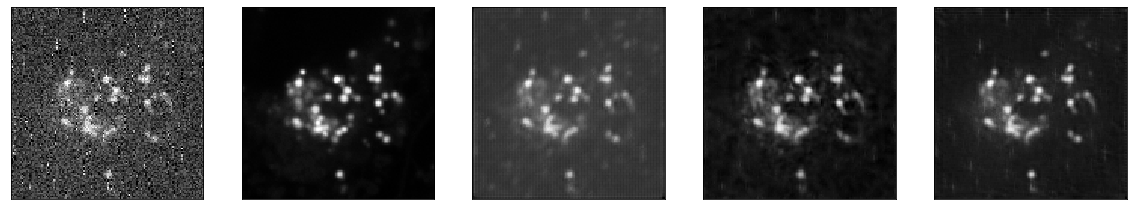

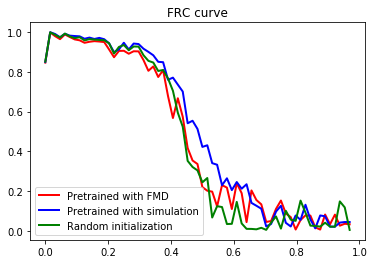

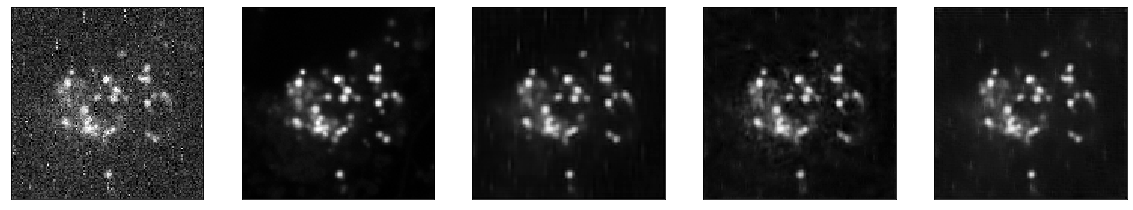

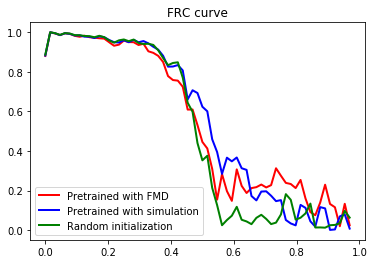

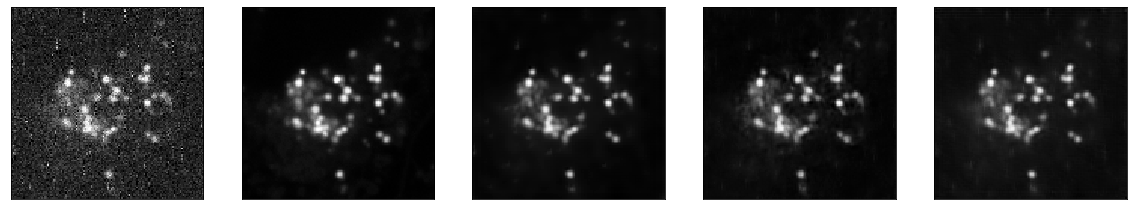

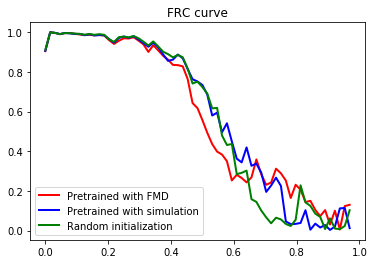

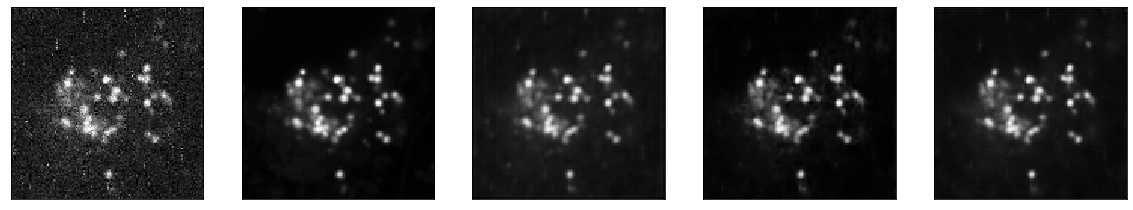

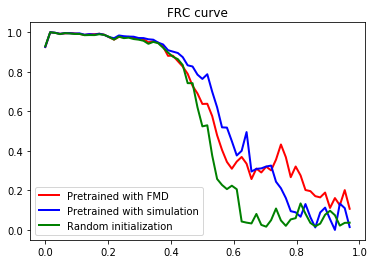

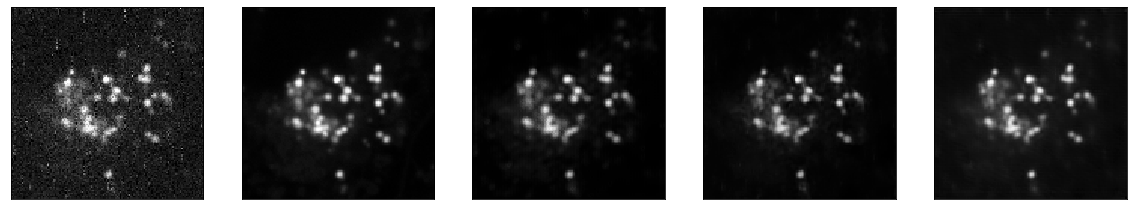

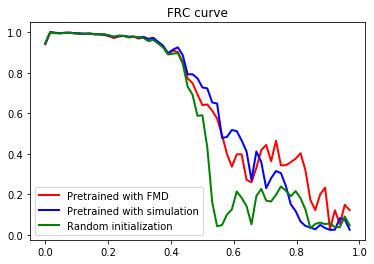

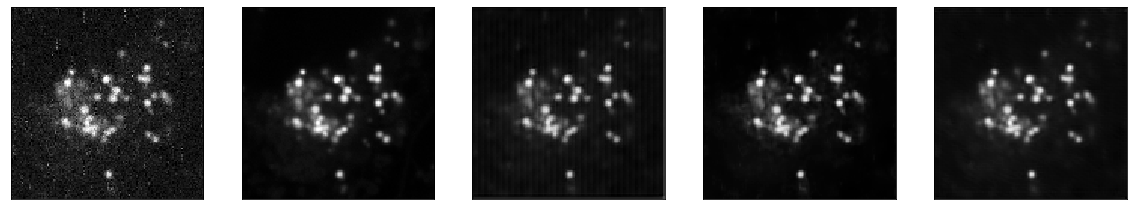

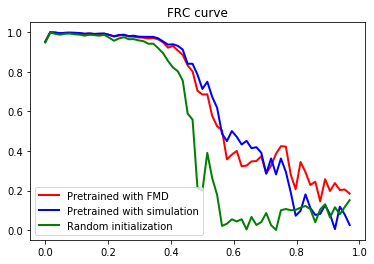

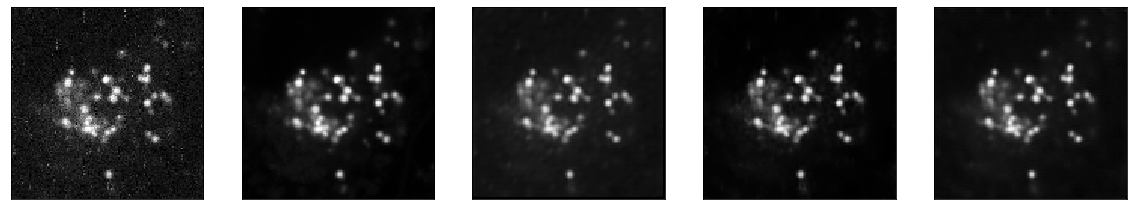

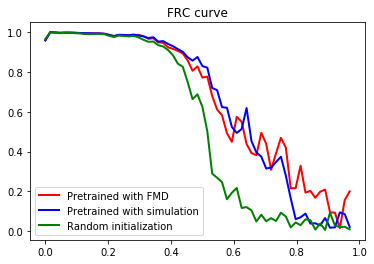

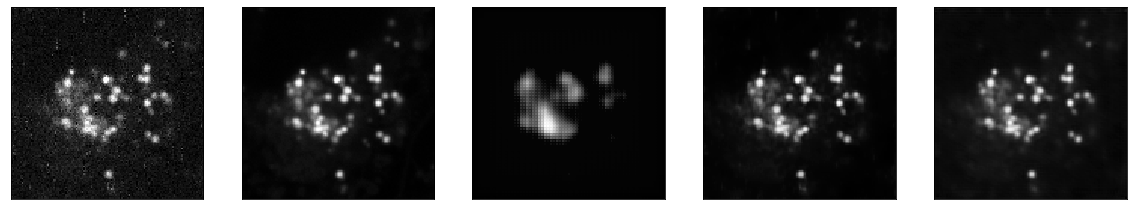

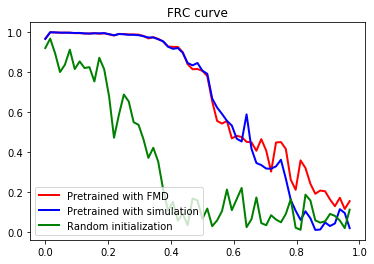

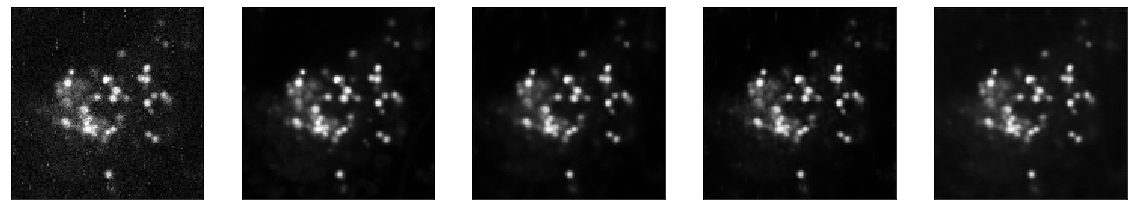

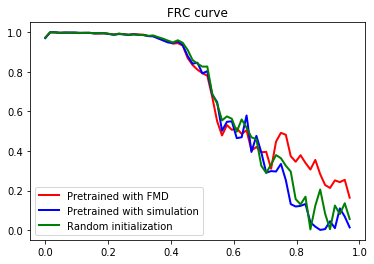

In [11]:
FMD = {}
random = {}
simulation = {}

for signal in config['psignal_levels']:
    key_s = signal
    FMD[key_s] = {}
    random[key_s] = {}
    simulation[key_s] = {}
    
    print(f"Running training with {signal} peak signal level...")
    n_epoch = config['n_iters']
    
    for repeat in range(config['repeats']):
        print(f"No. {repeat}...")
        loader, dataset = load_confocal(config['root'], config['train_stat'], config['batch_size'], 
                                        [signal], config['sample_size_list'][0], split_ratio = 0.2, 
                                        types=config['types'], captures=config['captures'],
                                        patch_size=config['patch_size'], loader=tiff_loader)
        noisy = dataset[0]
        clean = dataset[1]
        noisy, clean = noisy.type(torch.FloatTensor).to(device), clean.type(torch.FloatTensor).to(device)

        model_random = Unet(**config['Unet'])
        model_FMD = Unet(**config['Unet'])
        model_simulation = Unet(**config['Unet'])

        model_FMD.load_state_dict(torch.load('./models/FMD_epoch50_model'))
        model_simulation.load_state_dict(torch.load('./models/MT_simulation_iter1000_model'))

        optimizer_random = Adam(model_random.parameters(), lr=0.001)
        optimizer_FMD = Adam(model_FMD.parameters(), lr=0.0001)
        optimizer_simulation = Adam(model_simulation.parameters(), lr=0.0001)

        model_random = model_random.to(device)
        model_FMD = model_FMD.to(device)
        model_simulation = model_simulation.to(device)

        #print("Training: model initialized with FMD dataset training")
        model_FMD = train(model_FMD, loader, config['loss'], optimizer_FMD, n_epoch, \
                          masker, earlystop=True, patience=10, device=device, verbose=True)
        #print("Training: model initialized with simulated dataset training")
        model_simulation = train(model_simulation, loader, config['loss'], optimizer_simulation, n_epoch, \
                          masker, earlystop=True, patience=10, device=device, verbose=True)
        #print("Training: model randomly initialized")
        model_random = train(model_random, loader, config['loss'], optimizer_random, n_epoch, \
                             masker, earlystop=True, patience=10, device=device, verbose=True)

        output_FMD = model_FMD(noisy)
        output_random = model_random(noisy)
        output_simulation = model_simulation(noisy)
        
        # plot example images
        if repeat == 0:
            nplot = 1
            plot_tensors([noisy[nplot,0,:], clean[nplot,0,:], output_random[nplot,0,:], output_FMD[nplot,0,:], output_simulation[nplot,0,:]])

        output_FMD = output_FMD.cpu().detach().numpy()
        output_random = output_random.cpu().detach().numpy()
        output_simulation = output_simulation.cpu().detach().numpy()
        noisy = noisy.cpu().detach().numpy()
        clean = clean.cpu().detach().numpy()
        
        if repeat == 0 and True:
            frc_FMD, spatial_freq = frc(output_FMD[0,0,:], clean[0,0,:])
            frc_simulation, spatial_freq = frc(output_simulation[0,0,:], clean[0,0,:])
            frc_random, spatial_freq = frc(output_random[0,0,:], clean[0,0,:])
            plt.figure()
            plt.plot( spatial_freq , frc_FMD , '-' , linewidth=2 , color='red' , label='Pretrained with FMD' )
            plt.plot( spatial_freq , frc_simulation , '-' , linewidth=2 , color='blue' , label='Pretrained with simulation' )
            plt.plot( spatial_freq , frc_random , '-' , linewidth=2 , color='green' , label='Random initialization' )
            plt.legend(loc='lower left')
            plt.title('FRC curve')

        for sample in range(config['sample_size_list'][0]):
            output_random[sample,:] = match_intensity(clean[sample,:], output_random[sample,:])
            output_FMD[sample,:] = match_intensity(clean[sample,:], output_FMD[sample,:])
            output_simulation[sample,:] = match_intensity(clean[sample,:], output_simulation[sample,:])

        quantify(FMD[key_s], config['metrics_key'], clean[0,0, :], output_FMD[0,0,:])
        quantify(simulation[key_s], config['metrics_key'], clean[0,0, :], output_simulation[0,0,:])
        quantify(random[key_s], config['metrics_key'], clean[0,0, :], output_random[0,0,:])

In [12]:
noisy.shape

(10, 1, 128, 128)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


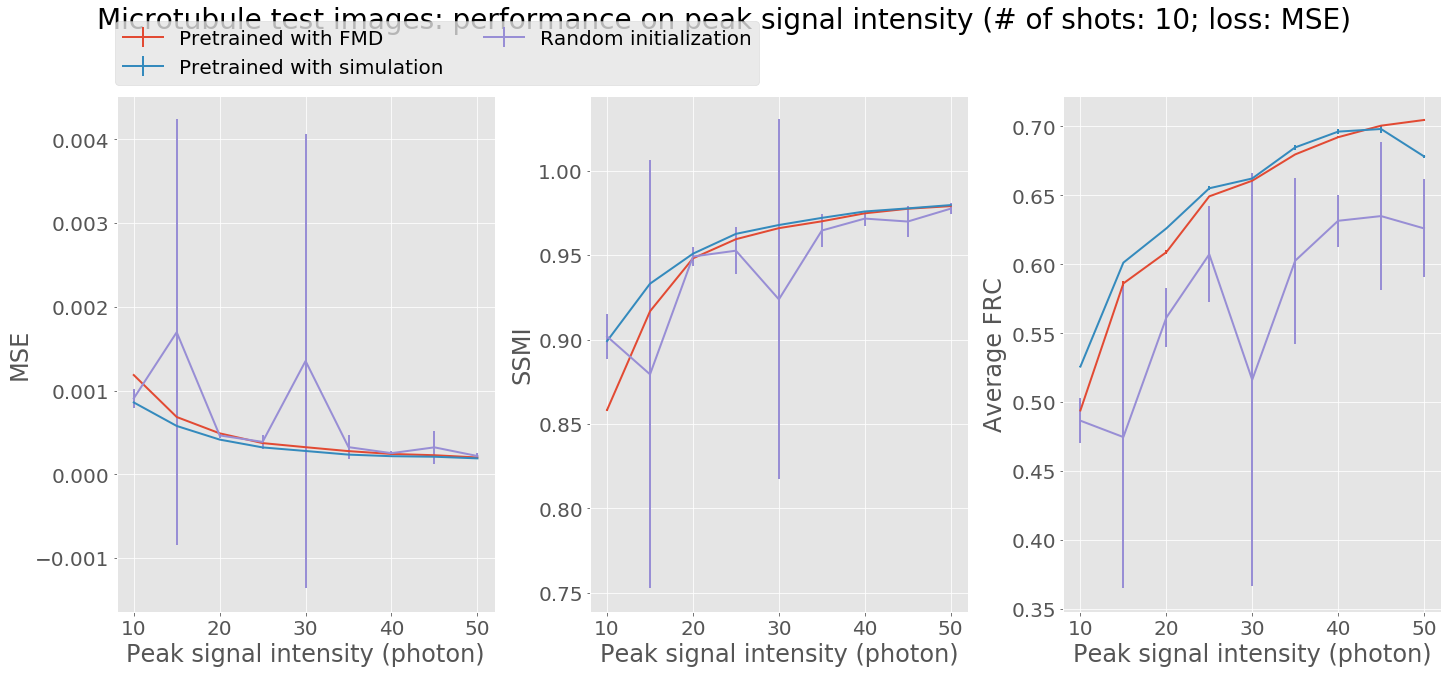

In [13]:
plot_quantifications([FMD,simulation,random], ['Pretrained with FMD','Pretrained with simulation', 'Random initialization'], config['metrics_key'], 
                     ylabel=['MSE', 'SSMI', 'Average FRC'], xlabel='Peak signal intensity (photon)', 
                     title='Microtubule test images: performance on peak signal intensity (# of shots: 10; loss: MSE)')

In [14]:
name, extension = os.path.splitext(filename)
filename0 = name + str(datetime.datetime.now()) + extension

with open(filename0, 'w') as fd:
    fd.write(json.dumps([config, FMD, simulation, random]))